<div style="text-align:center; font-size:45px; color: teal; letter-spacing: .1em;">
    MOVIES RECOMMENDATION SYSTEMS
</div>

<div>
    <h4><a href='#tbl-contents'>Back to table of contents</a></h4>
</div>
<div id='introduction'>
    <h2> INTRODUCTION </h2>
</div>


Intelligent algorithms can help viewers sift through tens of thousands of titles to find the best ones. Recommender systems are both socially and economically important in ensuring that people can make informed decisions about the content they consume on a daily basis. This is particularly true in the case of movie recommendations.

Providing an accurate and robust solution to this challenge has enormous economic potential, with users of the system receiving personalized recommendations, thereby enhancing platform affinity for the streaming services that best facilitate their audience's viewing.

### RECOMMENDER SYSTEM

A recommendation system is an information filtering system whose main goal is to predict the rating or preference a user might give to an item. This helps create personalized content and better product search experience. One popular use is recommending to users which movie to watch. This is because significant dependencies exist between users and item centric activity. For example a user who is interested in s historical documentary is more likely to be interested in another historical documentary or an educational program, rather than in an action movie.

A recommendation system can use either of these two techniques:

- Content based filtering
- Collaborative filtering

In content based filtering, the algorithm seeks to make recommendations based on how similar the properties or features of an item are to other items.

In collaborative filtering, we use similarities between users and items simultaneously to provide recommendations. This allows for serendipitous recommendations; that is, collaborative filtering models can recommend an item to user A based on the interests of a similar user B.

Here we are going to explore both methods and assess which recommendation system gives us the best results. Increasing sales is the primary goal of a recommender system. By recommending carefully selected items to users, recommender systems bring relevant items to the attention of users. This increases the sales volumes and profits to the merchants.

<div id='tbl-contents'>
    <h2>TABLE OF CONTENTS</h2>
    <ol>
        <li>
            <h4>
                <a href='#introduction'>Introduction</a>
            </h4>
        </li>
        <li>
            <h4>
                <a href='#load-dependencies'>Load Dependencies</a>
            </h4>
        </li>
        <li>
            <h4>
                <a href='#load-data'>Load Data</a>
            </h4>
        </li> 
        <li>
            <h4>
                <a href='#sneak-peek'>Sneak Peek into Loaded Data</a>
            </h4>
        </li> 
        <li>
            <h4>
                <a href='#data-cleaning'>Data Cleaning</a>
            </h4>
        </li> 
        <li>
            <h4>
                <a href='#eda'>Exploratory Data Analysis</a>
            </h4>
        </li>  
        <li>
            <h4>
                <a href='#FE'>Feature Engineering</a>
            </h4>
        </li>  
        <li>
            <h4>
                <a href='#recommender'>Recommender Systems</a>
            </h4>
        </li>  
    </ol>
</div>



<div>
    <h4><a href='#tbl-contents'>Back to table of contents</a></h4>
</div>
<div id='load-dependencies'>
    <h2>LOAD DEPENDENCIES</h2>
</div>

In [15]:
import os # for os operations on kaggle

# for pattern searching and extraction 
import re

# libraries for data analysis and manipulation
import pandas as pd
import numpy as np

# libraries for numerical efficiencies
import scipy as sp
from scipy import stats

# libraries for string matching
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# libraries for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
from wordcloud import WordCloud, STOPWORDS

# library to evaluate strings containing python literals
from ast import literal_eval

# libraries for natural language processing
from nltk.corpus import wordnet
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# libraries for building and analyzing recommender systems that deal with explicit rating data.
from surprise import Reader, Dataset, SVD
from surprise import KNNBasic, BaselineOnly, NMF

# libraries for entity featurization and similarity computation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from surprise.model_selection import cross_validate, train_test_split

# to ignore whatever warnings that may arise
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10) # defaulting all plots to a fixed size
sns.set(rc={'figure.figsize':(15,10)})
plt.style.use('ggplot')
sns.set_palette("Blues_r")
# sns.set_palette(sns.dark_palette("#69d"))

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<div>
    <h4><a href='#tbl-contents'>Back to table of contents</a></h4>
</div>
<div id='load-data'>
    <h2>LOAD DATASETS</h2>
</div>

In [3]:
def convert_columns(data):
    """
    This function takes in a dataset and converts the 
    dtype of each column to a lesser version to reduce
    the size of the dataset for further operations.
    """
    
    for col in data.columns: # iterate over the columns in the dataset
        
        if data[col].dtype == 'object':
            data[col] = data[col].astype('category') # convert objects to categories
        
        if data[col].dtype == 'int64':
            data[col] = data[col].astype('int32') # convert int64 to int32
        
        if data[col].dtype == 'float64':
            data[col] = data[col].astype('float32') # convert float64 to float32
        
    return data # return converted data


In [22]:
# Loading datasets. Change paths when working on a different platform or personal computer

imdb = pd.read_csv('resources/data/imdb_data.csv')
movies = pd.read_csv('resources/data//movies.csv')
meta_data = pd.read_csv('resources/data/movies_metadata.csv')
genome_scores = pd.read_csv('resources/data/genome_scores.csv')
genome_scores = convert_columns(genome_scores)
genome_tags = pd.read_csv('resources/data/genome_tags.csv')
genome_tags= convert_columns(genome_tags)
train = pd.read_csv('resources/data/train.csv')
train = convert_columns(train)
test = pd.read_csv('resources/data/test.csv')
test = convert_columns(test)
links = pd.read_csv('resources/data/links.csv')
links = convert_columns(links)
tags = pd.read_csv('resources/data/tags.csv')
tags = convert_columns(tags)
scores_n_tags = pd.read_csv('resources/data/scores_tags.csv')
sample_submission = pd.read_csv('resources/data/sample_submission.csv')

<div>
    <h4><a href='#tbl-contents'>Back to table of contents</a></h4>
</div>
<div id='sneak-peek'>
    <h2 style='text-transform: uppercase;'>Sneak Peak into Loaded Data</h2>
</div>

#### 1. IMDB DATA

In [23]:
# imdb data
imdb.head(3)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry


From the above output, we see that the IMDB Data is made up of __6__ columns - __movieId__, __title_cast__, __director__, __runtime__, __budget__, __plot_keywords__.

We can observe that the __title_cast__ and __plot_keywords__ columns are separated by a pipe - '|'. This makes each row in these columns seem to be one(1) long complicated word, which will make further analysis difficult. We will treat this problem in the `Data Cleaning` section.

Also, data in the __budget__ column, which is meant to be a numerical column, are prepended with currency symbols and separated by commas(,). This is bad format and needs to be taken care of in the `Data Cleaning` section.

In [24]:
# get the dimensions of the data
imdb.shape

(27278, 6)

IMDB data is made up of __27,278__ rows and __6__ columns.

How about some information about the data? 

In [25]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


The IMDB data has __1__ column of dtype `float64` - __runtime__, __1__ column of dtype `int64` - __movieId__ and __4__ columns of dtype `object` - __title_cast, director, budget & plot_keywords__. 

The __budget__ column is meant to be numerical to aid aggregation. This will be taken care of in the `Data Cleaning` section.

We also have a case of missing data in all columns bar __movieId__. Let's see by how much.

In [26]:
# Extract the number of missing data and the percentage
# of missing data and concatenate into one dataframe
imdb_missing_data = pd.concat([imdb.isnull().sum(), round(imdb.isnull().sum()/imdb.shape[0] * 100)], axis=1)
imdb_missing_data.columns = ['missing_count', 'missing_percentage'] # rename columns
imdb_missing_data

,missing_count,missing_percentage
movieId,0,0.0
title_cast,10068,37.0
director,9874,36.0
runtime,12089,44.0
budget,19372,71.0
plot_keywords,11078,41.0


`Budget` has the highest missing data with __19,372__! rows of missing data, making up __71%__! of the entire column - that is a huge amount!.

`Runtime` has the second highest missing values at __44%__, followed closely by `plot_keywords` at __41%__. `title_cast` and `director` also record missing values at __37%__ and __36%__ respectively.

These look like a lot of missing data and have to come up with creative ways to deal with this problem in `Feature Engineering` section.

Next, Movies data

#### 2. MOVIES DATA

In [27]:
# movies data
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


Here we can see that the Movies data is made up of __3__ columns - __movieId__, __title__, __genres__.

Similar to IMDB's __title_cast__ and __plot_keywords__, data in the __genres__ column are separated distinctly by a '|' symbol. As stated earlier, this will need to be taken care of in the `Data Cleaning` section.

The __title__ column holds both the _title_ of the movie and the _year of release_, like co-joined twins they need to be separated in the theatre of `Feature Engineering`.


Next, we will look at the dimensions of the data using `.shape` attribute of a Dataframe

In [28]:
# get the dimensions of the data
movies.shape

(62423, 3)

The movies dataset has __62,423__ rows of data and __3__ columns of features.

Fine, let's drill down a bit on the data by columns to gain a slightly better understanding using `.info` 

In [29]:
# get more information about the data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


There are __2__ objects columns - __title__ and __genres__ and __1__ numerical(_int64_) column.

We can safely say there are no missing values in any of the columns, judging from the shape of the dataset and the number of _non-null count_ for each column.

In [30]:
# Extract the number of missing data and the percentage
# of missing data and concatenate into one dataframe
movies_missing_data = pd.concat([movies.isnull().sum(), round(movies.isnull().sum()/movies.shape[0] * 100)], axis=1)
movies_missing_data.columns = ['missing_count', 'missing_percentage'] # rename columns
movies_missing_data

,missing_count,missing_percentage
movieId,0,0.0
title,0,0.0
genres,0,0.0


Our intuition was right afterall...

Next on the list, Meta_data!

#### 3. META_DATA DATA

In [31]:
meta_data.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


Wow! the meta_data dataset seem to be a more robust, upgraded and an agglomerated version of the IMDB dataset and Movies dataset with a lot more information about a movie. This will be very useful for our recommendation systems.

A drawback of note is that the meta_data does not have a "movieId", while we may use the "id" column instead, it doesn't map correctly with "movieId" of other datasets. 

What to do? let's keep that pending while we continue exploring the dataset.

Let's look at the dimensions of the data next.

In [32]:
# get the dimension of the data
meta_data.shape

(45466, 24)

This dataset has __45,466__ rows and __24__ columns.

More information please! `.info`

In [33]:
# get more information about the dataset
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

We have a lot more columns than we do for both `movies` and `IMDB` datasets combined. 

Question is, are they all useful for what we are trying to achieve? 

There are columns with missing values. It is difficult to know by how much, so let's break it down.

In [34]:
# Extract the number of missing data and the percentage
# of missing data and concatenate into one dataframe
meta_data_missing_data = pd.concat([meta_data.isnull().sum(), round(meta_data.isnull().sum()/meta_data.shape[0] * 100)], axis=1)
meta_data_missing_data.columns = ['missing_count', 'missing_percentage'] # rename columns
meta_data_missing_data

,missing_count,missing_percentage
adult,0,0.0
belongs_to_collection,40972,90.0
budget,0,0.0
genres,0,0.0
homepage,37684,83.0
id,0,0.0
imdb_id,17,0.0
original_language,11,0.0
original_title,0,0.0
overview,954,2.0


An astonishing __90%__! of data are missing in the __belongs_to_collection__ column, but that can be very misleading because not all the movies are part of a franchise or collection, meaning they don't have sequels. Also, __budget__ column appears to not have any missing value but from the initial sneak peek, we can see that there are movies with **Zero (0)** budget. This is practically not possible and need to be dealt with.

__homepage__ on the other hand, which has __83%__ of its data missing is not useful to us in the particular context of a recommender system. Therefore, it will be removed during `Feature engineering`

__tagline__, while have approximately half of its data missing may be of value us and cannot be discarded so easily.

Honorable mentions in the missing data category include; __overview__ - __2%__, __poster_path__ - __1%__ and __runtime__ - __1%__.

In [35]:
# check for duplicated values

meta_data.duplicated().sum()

13

Meta data contains __13__ duplicated rows. We will handle this in `Data Cleaning`

Up Next, Genome_scores.

#### 4. GENOME SCORES DATA

In [36]:
genome_scores.head(3)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250


This dataset is made up of __3__ columns, namely; __movieId__, __tagId__ and __relevance__.

Right now, we can only assume that __relevance__ indicates by how much a tag is of importance to a movie.

Let's look at the shape of the dataset

In [37]:
genome_scores.shape

(15584448, 3)

There are over __15 Million__ rows of data.

In [38]:
genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int32  
 1   tagId      int32  
 2   relevance  float32
dtypes: float32(1), int32(2)
memory usage: 178.3 MB


There's no information on the number of non-null rows.

Ther are __2__ *int32* columns and __1__ *float32* column, indicating it's an all-numeric dataset

Let's see if there are any missing data

In [39]:
# Extract the number of missing data and the percentage
# of missing data and concatenate into one dataframe
gs_missing_data = pd.concat([genome_scores.isnull().sum(), round(genome_scores.isnull().sum()/genome_scores.shape[0] * 100)], axis=1)
gs_missing_data.columns = ['missing_count', 'missing_percentage'] # rename columns
gs_missing_data

,missing_count,missing_percentage
movieId,0,0.0
tagId,0,0.0
relevance,0,0.0


There are no missing data.

Next, we look at Genome Tags.

#### 5. GENOME TAGS DATA 

In [40]:
genome_tags.head(5)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


This dataset has __2__ columns; __tagId__ and __tag__. 

Movie tags are another way to relate movies to each other.

Next, The dimensions of the dataset

In [41]:
genome_tags.shape

(1128, 2)

There are __1,128__ rows of data.

In [42]:
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   tagId   1128 non-null   int32   
 1   tag     1128 non-null   category
dtypes: category(1), int32(1)
memory usage: 47.8 KB


The dataset consists of __1__ categorical or text data column, much like 'object' and __1__ numerical column ('int32')

And there are no missing values, but let's double check.

In [43]:
# Extract the number of missing data and the percentage
# of missing data and concatenate into one dataframe
gt_missing_data = pd.concat([genome_tags.isnull().sum(), round(genome_tags.isnull().sum()/genome_tags.shape[0] * 100)], axis=1)
gt_missing_data.columns = ['missing_count', 'missing_percentage'] # rename columns
gt_missing_data

,missing_count,missing_percentage
tagId,0,0.0
tag,0,0.0


Our suspicion was correct afterall. Let's trust our gut feelings next time. :-)

Up next, we will be sneak peaking into the train dataset. stay tuned!

#### 6. TRAIN DATA

In [44]:
train.head(3)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539


At a glance, we see that the train dataset is made up of __4__ columns; __userId__, __movieId__, __rating__ and __timestamp__.

Here we have the rating each user gives a movie and also a timestamp of when such rating occured.

We will look at the shape of the data next

In [45]:
train.shape

(10000038, 4)

The dataset is made up of about __10 Million__ rows of data. Pretty large.

Let's extract more information.

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float32
 3   timestamp  int32  
dtypes: float32(1), int32(3)
memory usage: 152.6 MB


There are __4__ columns, all of which are numerical, consisting of __3__ columns of dtype *int32* and __1__ column of dtype *float32*. I am tempted to say there are no missing values and trust my gut feelings, but just to double check again...

In [47]:
# Extract the number of missing data and the percentage
# of missing data and concatenate into one dataframe
train_missing_data = pd.concat([train.isnull().sum(), round(train.isnull().sum()/train.shape[0] * 100)], axis=1)
train_missing_data.columns = ['missing_count', 'missing_percentage'] # rename columns
train_missing_data

,missing_count,missing_percentage
userId,0,0.0
movieId,0,0.0
rating,0,0.0
timestamp,0,0.0


Sorry gut feelings!

#### 7. LINKS DATA

In [48]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Links, as the name suggests, contains only primary keys (columns with unique identity for each data point)  to other datasets. 

It is made up of **3** columns; __movieId__, __imdbId__ & __tmdbId__

In [49]:
links.shape

(62423, 3)

There are __62,423__ rows in the dataset

In [50]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int32  
 1   imdbId   62423 non-null  int32  
 2   tmdbId   62316 non-null  float32
dtypes: float32(1), int32(2)
memory usage: 731.6 KB


All columns are numeric columns; __2__ _int32_ and __1__ _float32_ column(s) respectively. 

__tmdbId__ seems to have missing values, let's check by how much

In [51]:
# Extract the number of missing data and the percentage
# of missing data and concatenate into one dataframe
links_missing_data = pd.concat([links.isnull().sum(), round(links.isnull().sum()/links.shape[0] * 100, 3)], axis=1)
links_missing_data.columns = ['missing_count', 'missing_percentage'] # rename columns
links_missing_data

,missing_count,missing_percentage
movieId,0,0.000
imdbId,0,0.000
tmdbId,107,0.171


The number of missing data here is very negligible at __0.171%__, which I believe won't create significant problems

For our final show in this section, we will take a sneak peek into the tags dataset

#### 8. TAGS DATA

In [52]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


This dataset also has __4__ columns; __userId__, __movieId__, __tag__ and __timestamp__.

__tag__ also features here as it did in `genome_tags` dataset. Is there a difference? or are they the same? This we will explore in the `Exploratory Data Analysis` section.

Next, we will take a look at the dimensions of the dataset

In [53]:
tags.shape

(1093360, 4)

There are over __1 Million__ rows of data in this dataset.

Let's get some more information.

In [54]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype   
---  ------     --------------    -----   
 0   userId     1093360 non-null  int32   
 1   movieId    1093360 non-null  int32   
 2   tag        1093344 non-null  category
 3   timestamp  1093360 non-null  int32   
dtypes: category(1), int32(3)
memory usage: 19.3 MB


There are __3__ numerical columns and __1__ categorical column which is the __tag__ column. 

The tag column also seem to be missing some values. Let's confirm this.

In [55]:
# Extract the number of missing data and the percentage
# of missing data and concatenate into one dataframe
tags_missing_data = pd.concat([tags.isnull().sum(), round(tags.isnull().sum()/tags.shape[0] * 100, 3)], axis=1)
tags_missing_data.columns = ['missing_count', 'missing_percentage'] # rename columns
tags_missing_data

,missing_count,missing_percentage
userId,0,0.000
movieId,0,0.000
tag,16,0.001
timestamp,0,0.000


There's a very very negligible number of missing data at __0.001%__. That won't do us much harm.

And with that, we've come to the end of the `Sneak Peek into Loaded Data Section`. 

Here, we had a brief overview of the datasets we intend to work with and what needs to be done to get our data ready for further analysis and modeling.


During the sneak peeking, we noticed that there are some columns that aren't just right. In the next section, we will be making use of a bunch of techniques to prepare the data into the right and useable formats in a process known as `Data Cleaning`

<div>
    <h4><a href='#tbl-contents'>Back to table of contents</a></h4>
</div>
<div id='data-cleaning'>
    <h2 style='text-transform: uppercase;'>data cleaning</h2>
</div>

#### WHAT IS DATA CLEANING?

The process of repairing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data from a dataset is known as `Data Cleaning`. There are numerous opportunities for data to be duplicated or mislabeled when combining multiple data sources. If the data is incorrect, the results and algorithms are untrustworthy, even if they appear to be correct.

This will be done for every datasets we intend to work with.

#### 1. IMDB DATA

First, let's make a copy of the dataset

In [56]:
# make a copy of the dataset
imdb_copy = imdb.copy(deep=True)

...then let's remind ourselves what messy data we have on our hands

In [57]:
imdb_copy.head(3)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry


For the *title_cast* column, we will split each row on '|' and we want to keep the firstname and lastname of the actors together so we join the first names and last names with an underscore('_'), same for the directors and make them lowercase

For *plot_keyword*, we will replace '|' with a space ' ', remove stopwords and we lemmatize or stem the word or both.

For the *budget* column, we will remove the commas(',') and extract the digits into a separate column and the currency symbols into another

In [58]:
# check for duplicated data

imdb_copy.duplicated().sum()

0

There are no duplicated data in the IMDB Dataset

#### Agenda
1. Fill null values with ''(blank) for both *title_cast*, *director* and *plot_keywords*
2. Split *title_cast* on '|', join the first and last names of each actor with '_' and convert to lowercase letters
3. Replace '|' with ' '(a space) in *plot_keywords*
4. Remove stopwords in plot_keywords
5. Replace ',' in _budget_ column with ''(nothing)
6. Extract currency symbol into another column called 'symbol' and amount into 'budget_amount'
7. Convert the dtype of budget to 'float32'

In [59]:
# Agenda 1: Fill null values with ''(blank)

imdb_copy['title_cast'] = imdb_copy['title_cast'].fillna('')
imdb_copy['director'] = imdb_copy['director'].fillna('')
imdb_copy['plot_keywords'] = imdb_copy['plot_keywords'].fillna('')

In [60]:
# Agenda 2: Split title_cast on '|', join the first and last names of each actor with '_'

def clean_text(text):
    
    # split text on '|'
    text_split = text.split('|')
    
    # replace the space between the actors first name and
    # lastname with an underscore, convert to lowercase
    # and then join into a string.
    text_replace = ' '.join([x.replace(' ', '_') if len(x) > 0 else '' for x in text_split]).lower()
    
    # return transformed text
    return text_replace

# apply clean_text function to each row
imdb_copy['title_cast'] = imdb_copy['title_cast'].apply(clean_text) 

# replace the space between the directors' first name and 
# last names with an underscore, and convert to lowercase
imdb_copy['director'] = imdb_copy['director'].apply(lambda row: row.replace(' ', '_').lower())

In [61]:
# Agenda 3: Replace '|' with ' '(a space) in plot_keywords

# pick column and use .apply() with the lambda function to replace "|" character
# with a space.
imdb_copy['plot_keywords'] = imdb_copy['plot_keywords']\
                            .apply(lambda row: row.replace('|', ' '))

In [62]:
# Agenda 4: Remove stopwords from *plot_keywords*
stopwords = set(STOPWORDS)

def remove_stopwords(text):
    split_text = text.split()
    text = ' '.join([x for x in split_text if x not in stopwords])  
    return text    

imdb_copy['plot_keywords'] = imdb_copy['plot_keywords'].apply(remove_stopwords)

In [63]:
# Agenda 5: Replace ',' in budget column with ''(nothing)

# replace commas in budget amount with blanks
# excluding rows with values np.Nan
imdb_copy['budget'] = imdb_copy['budget']\
                                .apply(lambda row: row.replace(',', '')\
                                      if type(row) == str else row)

Removing the commas before using regex to extract amounts and currency symbols is important because trying to extract the digits first before removing commas will result in extracting only the first few digits found before a comma, leaving us with only the million figure without the zeros (i.e 35 instead of 35000000)

In [64]:
# Agenda 6: Extract currency symbol into another column called 'symbol' and amount into 'budget_amount'

pattern = '[0-9]+' # pattern to search for digits
symbol = '[$A-Za-z]+' # patter to search for alpha characters

# extract the budget amount from the budget column 
# and put it in `budget_amount column 
# excluding rows with values np.Nan
imdb_copy['budget_amount'] = imdb_copy['budget']\
                            .apply(lambda row: re.search(pattern, row)\
                                   .group() if type(row) == str else row)

# extract the currency symbol from the budget column
# and put it in `symbol` column
# excluding rows with values np.Nan
imdb_copy['symbol'] = imdb_copy['budget']\
                            .apply(lambda row: re.search(symbol, row)\
                                   .group() if type(row) == str else row)

In [65]:
# Agenda 7: Convert the dtype of budget to 'float32'

imdb_copy['budget_amount'] = imdb_copy['budget_amount'].astype('float32')

In [66]:
imdb_copy.head(3)

,movieId,title_cast,director,runtime,budget,plot_keywords,budget_amount,symbol
0,1,tom_hanks tim_allen don_rickles jim_varney wal...,john_lasseter,81.0,$30000000,toy rivalry cowboy cgi animation,30000000.0,$
1,2,robin_williams jonathan_hyde kirsten_dunst bra...,jonathan_hensleigh,104.0,$65000000,board game adventurer fight game,65000000.0,$
2,3,walter_matthau jack_lemmon sophia_loren ann-ma...,mark_steven_johnson,101.0,$25000000,boat lake neighbor rivalry,25000000.0,$


So far, we have been able to clean the imdb data to a certain degree and I am currently happy with the result. 

The redundant columns will be handled during `Feature Engineering`

Next we will be cleaning the Movies Dataset

#### 2. MOVIES DATA

In [67]:
# make a copy

movies_copy = movies.copy(deep=True)

In [68]:
movies_copy.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [69]:
# check for duplicated data

movies_copy.duplicated().sum()

0

There are no duplicated data

The Agenda for this dataset will be;

1. Split the title into 2 columns, title and year_released and convert the title column to lowercase
2. Replace '|' with ' '(space) in the genres column and convert to lowercase

In [70]:
# Agenda 1: Split the title into 2 columns, title and year_released

movies_copy['year'] = movies_copy['title'].apply(lambda x: x[-7:].replace('(', '').replace(')', ''))

#convert year to a numeric column
movies_copy['year'] = pd.to_numeric(movies_copy['year'], errors='coerce', downcast='float')

movies_copy['title'] = movies_copy['title'].apply(lambda x: x[:-7].strip().lower())

In [71]:
# Agenda 2: Replace '|' with ' '(space) in the genres column

movies_copy['genres'] = movies_copy['genres'].apply(lambda row: row.replace('|', ' ').lower())

In [72]:
movies_copy.head(3)

,movieId,title,genres,year
0,1,toy story,adventure animation children comedy fantasy,1995.0
1,2,jumanji,adventure children fantasy,1995.0
2,3,grumpier old men,comedy romance,1995.0


Everything seems to have worked out fine, and I am happy with the results


Next, Meta_data

#### 3. META DATA

Recall that meta_data is a robust agglomerated version of the IMDB and Movies Datasets. The meta_data meanwhile, does not contain values for some of the data points that are available in Movies and IMDB datasets, for instance, some movie budgets data available in the IMDB dataset are not available in the Meta dataset.

After cleaning, we will take a look at how to maximally utilise all datasets involved

In [73]:
# make a copy
meta_copy = meta_data.copy(deep=True)

# drop possible duplicates
meta_copy.drop_duplicates(inplace=True)

In [74]:
meta_copy.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [75]:
# displaying the truncated columns
meta_copy.loc[:, 'overview': 'release_date'].head(3)

,overview,popularity,poster_path,production_companies,production_countries,release_date
0,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30
1,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15
2,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22


This is a very messy data. Let's get to work

Let's set our cleaning agenda for this dataset;

1. Column *Belongs_to_collection* should be converted to a boolean field (True or False)
2. Extract the genres from column _genres_ as they are store in dictionaries in a list
3. Extract the digits from the *imdb_id* column and rename the column to _imdbId_
4. Convert *popularity* to 'float32'
5. Extract *production_companies* and *production_countries*
6. Extract _year_ from *release_date*
7. Extract _language_ from *spoken_languages*
8. Replace Zeros in budget with np.nan and make column a numerical column
9. convert _title_ column to lowercase


In [76]:
# Agenda 1: Column Belongs_to_collection should be converted to a boolean field (True or False)

meta_copy['belongs_to_collection'] = meta_copy['belongs_to_collection']\
                                        .apply(lambda row: True if type(row) != float else False )

Moving on to the second agenda. The __Genres__ column is a list of objects or dictionaries made of 'id' - referring to the genre's id and the 'name' - referring to the genre itself. This is really poor formatting if we are going to make use of this dataset. **Production_companies**, **production_countries** and **spoken_languages** are formatted In a similar fashion.

To deal with this problem, we will be applying a custom function we will call `decompose` to help us extract what we need from these columns. But first, since each row in these columns is stored as a 'string', we will apply 'literal_eval' which evaluates a string containing a python literal, such as a list, dictionary etc...

Let's see an example

In [77]:
x = "[{'id': 12, 'name': 'Adventure'},{'id': 14, 'name': 'Fantasy'},{'id': 10751, 'name': 'Family'}]"

print(f"Data type of x before literal_eval: {type(x)}")

x = literal_eval(x)

print(f"Data type of x after literal_eval: {type(x)}")

Data type of x before literal_eval: <class 'str'>
Data type of x after literal_eval: <class 'list'>


Literal_eval takes the text and returns its true form. Let's apply this in cleaning our dataset

In [78]:
# Agenda 2: Extract the genres from column genres as they are store in dictionaries in a list

def decompose(text, key='name'):
    
    try:
        # check if text is np.nan 
        if type(text) == float:
            decomposed_text = text
            
        #apply literal_exal to each row of data
        eval_text = literal_eval(text)

        # get the name key of each dictionary in the list
        # store extracted name in a list
        # join each item in the list into a string
        decomposed_text = ' '.join([dictionary[key].replace(' ', '_') for dictionary in eval_text]).lower()
    
    except (ValueError, TypeError):
        decomposed_text = np.nan
        
    return decomposed_text

In [79]:
# apply the decompose function on the genres column.
meta_copy['genres'] = meta_copy['genres'].apply(decompose)

In [80]:
meta_copy.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,True,30000000,animation comedy family,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,False,65000000,adventure fantasy family,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


The function does its job well and I'm very happy with the results.

Next, we will extract digits from the **imdb_id** column and rename it

In [81]:
# Agenda 3: Extract the digits from the imdb_id column and rename the column to imdbId

re_pattern = '\d+' # regex to extract 1 or more digits

# applying regex, search through every row text, find every digits
# in the text then return the group of texts if the row is not 'null'
meta_copy['imdb_id'] = meta_copy['imdb_id']\
                        .apply(lambda row: re.search(re_pattern, row)\
                              .group() if type(row) == str else np.nan)\
                                .astype('float32') # convert the column to dtype 'int32'

# rename the 'imdb_id' to 'imdbId' 
meta_copy = meta_copy.rename(columns={'imdb_id': 'imdbId'})

In [82]:
# Agenda 4: Convert popularity to float32

meta_copy['popularity'] = pd.to_numeric(meta_copy['popularity'], downcast='float', errors='coerce')

In [83]:
# Agenda 5: Extract production_companies and production_countries

boolean = np.where((meta_copy['production_companies'] == True) | \
                   (meta_copy['production_companies'] == 'True') | \
                  (meta_copy['production_companies'] == False) | \
                  (meta_copy['production_companies'] == 'False') | \
                  (meta_copy['production_companies'] == 'nan') | \
                  (meta_copy['production_companies'] == np.nan)) 

data = meta_copy.iloc[boolean]
data.loc[:,'overview':'release_date']

,overview,popularity,poster_path,production_companies,production_countries,release_date
19730,Released,NaN,Midnight Man,False,6.0,1
29503,Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12
35587,Released,NaN,Avalanche Sharks,False,4.3,22


There are boolean values in the **production_companies** column which can cause problems, so we will replace these values with 'np.NaN'. Also **production_countries** contains some floating point values which are not supposed to be there. we will replace these with np.nan

In [84]:
meta_copy['production_companies'] = meta_copy['production_companies']\
                                    .apply(lambda x: np.nan if x in ('', ' ', 'True', True, 'False', False) else x)\
                                    .apply(decompose)

meta_copy['production_countries'] = meta_copy['production_countries']\
                                    .apply(lambda x: np.nan if x in ('', ' ', 'True', True, 'False', False) else x)\
                                    .apply(decompose)

In [85]:
meta_copy.loc[:, 'overview':'release_data'].iloc[boolean]

,overview,popularity,poster_path,production_companies,production_countries
19730,Released,NaN,Midnight Man,NaN,NaN
29503,Released,NaN,Mardock Scramble: The Third Exhaust,NaN,NaN
35587,Released,NaN,Avalanche Sharks,NaN,NaN


In [86]:
# Agenda 6: Extract year from release_date

meta_copy['year'] = meta_copy['release_date']\
                        .apply(lambda row: row[0:4] \
                              if type(row) == str else np.nan).astype('float32')

meta_copy.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdbId,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,True,30000000,animation comedy family,http://toystory.disney.com/toy-story,862,114709.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995.0
1,False,False,65000000,adventure fantasy family,NaN,8844,113497.0,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0
2,False,True,0,romance comedy,NaN,15602,113228.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0


In [87]:
# Agenda 7: Extract language from spoken_languages

# here, we change the key of the decompose function
# because we want the encoding of the language
# not the language name itself
meta_copy['spoken_languages'] = meta_copy['spoken_languages']\
                                    .apply(decompose, args=('iso_639_1',))

meta_copy.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdbId,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,True,30000000,animation comedy family,http://toystory.disney.com/toy-story,862,114709.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,en,Released,NaN,Toy Story,False,7.7,5415.0,1995.0
1,False,False,65000000,adventure fantasy family,NaN,8844,113497.0,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,en fr,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0
2,False,True,0,romance comedy,NaN,15602,113228.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,en,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0


In [88]:
# Agenda 8: Replace Zeros in budget with np.nan and make column a numerical column

meta_copy['budget'] = meta_copy['budget'].apply(lambda row: np.nan if row == '0' else row)
meta_copy['budget'] = pd.to_numeric(meta_copy['budget'], downcast='float', errors='coerce')

meta_copy['budget'].tail()

45461   NaN
45462   NaN
45463   NaN
45464   NaN
45465   NaN
Name: budget, dtype: float32

In [89]:
# Agenda 9: Convert title to lowercase

# Convert title column to lowercase
meta_copy['title'] = meta_copy['title'].str.lower()

meta_copy.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdbId,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,True,30000000.0,animation comedy family,http://toystory.disney.com/toy-story,862,114709.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,en,Released,NaN,toy story,False,7.7,5415.0,1995.0
1,False,False,65000000.0,adventure fantasy family,NaN,8844,113497.0,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,en fr,Released,Roll the dice and unleash the excitement!,jumanji,False,6.9,2413.0,1995.0
2,False,True,NaN,romance comedy,NaN,15602,113228.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,en,Released,Still Yelling. Still Fighting. Still Ready for...,grumpier old men,False,6.5,92.0,1995.0


We have successfully cleaned up some of our datasets a bit which may aid our process of `Exploratory Data Analsys` or **EDA** for short.

However, we do have a decision to make concerning which of **Movies and IMDB** datasets and **Meta Data** dataset.

Let's carry out a preliminary exploratory data analysis on these datasets

##### PRELIM EDA.

In [90]:
print(f'Movies has: {movies_copy.shape[0]} rows and {movies_copy.shape[1]} columns\n\
Imdb data has: {imdb_copy.shape[0]} rows and {imdb_copy.shape[1]} columns\n\
Meta_data has: {meta_copy.shape[0]} rows and {meta_copy.shape[1]} columns')

Movies has: 62423 rows and 4 columns
Imdb data has: 27278 rows and 8 columns
Meta_data has: 45453 rows and 25 columns


Movies dataset has more rows than imdb and meta_data, meaning there are more observations in the Movies dataset. Meanwhile, Meta_data has more columns than movies and imdb datasets combined, meaning the meta_data dataset holds more information that may useful to our course than the other two.


Next, lets see the features(columns) they all have.

In [91]:
print(f"Movies_features \t>>>> \t{' | '.join(movies.columns)}\n\
Imdb_features \t>>>> \t{' | '.join(imdb.columns)}\n\
Meta_features \t>>>> \t{' | '.join(meta_copy.columns)}")

Movies_features 	>>>> 	movieId | title | genres
Imdb_features 	>>>> 	movieId | title_cast | director | runtime | budget | plot_keywords
Meta_features 	>>>> 	adult | belongs_to_collection | budget | genres | homepage | id | imdbId | original_language | original_title | overview | popularity | poster_path | production_companies | production_countries | release_date | revenue | runtime | spoken_languages | status | tagline | title | video | vote_average | vote_count | year


There are some intesting features in all the datasets that immense use to our algorithms. Meanwhile, it is worthy to note that all of the features in the movies dataset appear in the meta_data dataset, bar 'movieId'. Not forgetting that the movies dataset has more observations than the meta_data, we have to look for a way to make the best use of both datasets.

The IMDB dataset more data about the people in the movie - the casts and the directors of each movies. These are particularly important features when we try to make movie recommendations to users based on the actors in the movies or the director of the movie as many users have biases/favorites in these categories.

We have to think of ways to incorporate these datasets and their unique attribute into the algorithms we will build later on.

In the meta_data dataset, there are come movies without budget amounts while in the Imdb dataset, these movies seem to have budgets. Let's do a bit of Sherlock Holmes here, shall we?

In [92]:
# first, lets merge the movies and Imdb data on movieId
# to get the title column

temp_df = imdb_copy.merge(movies_copy[['title', 'movieId']], on='movieId')
temp_df.head(3)

,movieId,title_cast,director,runtime,budget,plot_keywords,budget_amount,symbol,title
0,1,tom_hanks tim_allen don_rickles jim_varney wal...,john_lasseter,81.0,$30000000,toy rivalry cowboy cgi animation,30000000.0,$,toy story
1,2,robin_williams jonathan_hyde kirsten_dunst bra...,jonathan_hensleigh,104.0,$65000000,board game adventurer fight game,65000000.0,$,jumanji
2,3,walter_matthau jack_lemmon sophia_loren ann-ma...,mark_steven_johnson,101.0,$25000000,boat lake neighbor rivalry,25000000.0,$,grumpier old men


In [93]:
# Get movies without budget from meta_data
meta_without_budget = meta_copy['title'].str.lower()[meta_copy['budget'].isnull()]

# Get movies without budget from temp_df
imdb_without_budget = temp_df['title'][temp_df['budget_amount'].isnull()]

print(f'meta: {meta_without_budget.shape} making up \
{round(meta_without_budget.shape[0]/meta_copy.shape[0]*100)}% missing\n\
Imdb: {imdb_without_budget.shape} making up \
{round(imdb_without_budget.shape[0]/imdb_copy.shape[0]*100)}% missing')

meta: (36564,) making up 80% missing
Imdb: (17583,) making up 64% missing


These are significant amounts of missing data.

Lets see the similar movies

In [94]:
sim_movies = meta_without_budget[meta_without_budget.isin(imdb_without_budget)]

print(sim_movies)

7            tom and huck
12                  balto
25                othello
27             persuasion
32       wings of courage
               ...       
45415         the hunters
45420      arabian nights
45421          pickpocket
45460          robin hood
45463            betrayal
Name: title, Length: 10122, dtype: object


The above output are movies that do not have a budget amount in both Imdb dataset and meta_data dataset. There __10,122__ movies without a budget in both datasets

In [95]:
# Extracting movies that are in the Imdb dataset 
# from the ones without a budget amount in meta_data
sim = np.where(temp_df['title'].isin(sim_movies))

new_df = temp_df.iloc[sim]

new_df = new_df[new_df['budget_amount'].notnull()]

new_df.shape

(289, 9)

There are __289__ movies in the Imdb data that have budget amounts which are missing in the meta_data dataset. This doesn't solve a significant amount of our problem, we can move on without it.

In [96]:
# free up some space
del temp_df
del sim_movies
del sim
del new_df
del meta_without_budget
del imdb_without_budget

All other datasets seem to be prim and proper

<div>
    <h4><a href='#tbl-contents'>Back to table of contents</a></h4>
</div>
<div id='eda'>
    <h2 style='text-transform: uppercase;'>Exploratory Data Analysis</h2>
</div>

Exploratory Data Analysis,also known as EDA, refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

As before, we will be performing the EDA process dataset by dataset, starting with the IMDB Data. Let's see what we have to work with first

#### 1. IMDB DATA

In [97]:
imdb_copy.head(3)

,movieId,title_cast,director,runtime,budget,plot_keywords,budget_amount,symbol
0,1,tom_hanks tim_allen don_rickles jim_varney wal...,john_lasseter,81.0,$30000000,toy rivalry cowboy cgi animation,30000000.0,$
1,2,robin_williams jonathan_hyde kirsten_dunst bra...,jonathan_hensleigh,104.0,$65000000,board game adventurer fight game,65000000.0,$
2,3,walter_matthau jack_lemmon sophia_loren ann-ma...,mark_steven_johnson,101.0,$25000000,boat lake neighbor rivalry,25000000.0,$


Looking at the data, there are a few questions we can find answers to;

1. What are the minimum, average and maximum runtimes?
2. What are the minimum, average and maximim budgets for a movie?
3. The currency symbols denote countries, which countries are movies produced in?
4. Who is/are the most featured casts?
5. Director with the most movies?
6. What plot keywords are most frequent?
7. Does runtime influence the budget?
8. How many movies are represented by this dataset?

To answer Questions 1 through 3, Let us get some descriptive statistics about the data

In [98]:
# Question 1: What are the minimum, average and maximum runtimes?
# Question 2: What are the minimum, average and maximim budgets for a movie?

imdb_copy.describe()

,movieId,runtime,budget_amount
count,27278.000000,15189.000000,7.906000e+03
mean,59855.480570,100.312331,4.031603e+07
std,44429.314697,31.061707,4.255497e+08
min,1.000000,1.000000,0.000000e+00
25%,6931.250000,89.000000,2.700000e+06
50%,68068.000000,98.000000,1.000000e+07
75%,100293.250000,109.000000,3.000000e+07
max,131262.000000,877.000000,3.000000e+10


This gives a brief statistical description of the data. 

**ANSWER 1 & 2**

From the output, we can deduce that movies have an average runtime of __100__ mins, a minimum of __1__ minute and a maximum of __877__ mins (roughly __14__ hours! interesting.)

The average budget for a movie is roughly __40 Million__, a minimum of __0__ and a maximum of __30 Billion__. Notice we are not using any currency to quantify the budget? That's because not all of the budget amounts are denoted in a single currency; they vary, leading to a lot of skewness in our data. We will sort that out later in `Feature Engineering`. 

In [99]:
# Question 3: The currency symbols denote countries, which countries are movies produced in?

imdb_copy.describe(include='object')

,title_cast,director,budget,plot_keywords,symbol
count,27278,27278,7906,27278,7906
unique,17144,11787,1362,16007,53
top,,,$10000000,,$
freq,10068,9874,232,11078,6426


**ANSWER 3**

Here, we can deduce that there are __9,874__ movie directors, __USD10 Million__ budget for movies is more frequent and we can assume that a lot of the movies in the dataset were produced in the United States with a '$' frequency of __6,426__

For the remainder of questions, we will employ the help of some custom functions

In [100]:
def aggregate(series):
    """
    This function `collects` all the values in a 
    pd.Series and returns a frequency table of the 
    number of occurence for each value
    """
    # call the collect function the get a list
    # of values in a column and store result in
    # a variable called items
    items = collect(series)
    
    # initialise an empty dictionary to store 
    # values and their counts
    frequency = {}
    
    # iterate over items
    for item in items:
        # check if individual item is in initialised 
        # dictionary
        if item in frequency:
            # add 1 to its value count if it exists
            # in the initialised dictionary
            frequency[item] += 1
        else:
            # set its value count to 1 if it doesn't
            # exist in the initialised dictionary
            frequency[item] = 1
    
    # sort the frequecy table from highest to lowest
    sorted_freq = {k: v for k, v in sorted(frequency.items(), reverse=True, key=lambda item: item[1])}
    
    # return sorted frequency table
    return sorted_freq

def collect(series):
    """
    This function takes in a pd.Series object that
    contains lists as rows and then breaks it down
    into a single list.
    """
    # initialise and empty list to contain
    # the broken down column of lists
    collection = []
    
    # iterate over the column
    for i in series:
        # iterate over the column iter
        for j in i:
            # append value to collection
            collection.append(j)
    # return collection
    return collection

def word_cloud(data, category):
    """
    This function generates a word cloud visualisation
    """
    
    stopwords = set(STOPWORDS)
    
    # Instantiate wordcloud object
    word_cloud = WordCloud(collocations =False,
                           background_color = 'Black',
                           stopwords=stopwords,
                           width=1600,
                           height=800,
                           contour_width=2,
                           contour_color='steelblue',
                          random_state= 1)
    # generate wordcloud images
    word_cloud.generate_from_frequencies(data)
    # Create Plot
    
    plt.figure(figsize =(10,10))
    plt.imshow(word_cloud, interpolation ='bilinear' )
    plt.axis('off')
    plt.title('Most Frequent {}'.format(category.capitalize()), size = 25, pad =15)
    plt.show()

In [101]:
# Question 4: Who is/are the most featured actor(s)

def get_top_n(series, n=10, col=None):

    features = aggregate(series.apply(lambda row: row.split()))

    most_featured = pd.DataFrame.from_dict(features, orient='index').reset_index().head(n)

    most_featured.columns = [col, '# of features']

    return (most_featured, features)

featured_actors = get_top_n(imdb_copy['title_cast'], col='Actors')[1]
most_featured_actors_10 = get_top_n(imdb_copy['title_cast'], col='actors')[0]

print(f"There are {len(set(featured_actors.keys()))} actors in total")
most_featured_actors_10

There are 121023 actors in total


,actors,# of features
0,samuel_l._jackson,83
1,steve_buscemi,68
2,keith_david,61
3,willem_dafoe,59
4,robert_de_niro,58
5,christopher_walken,57
6,brian_cox,57
7,gérard_depardieu,57
8,bruce_willis,56
9,morgan_freeman,56


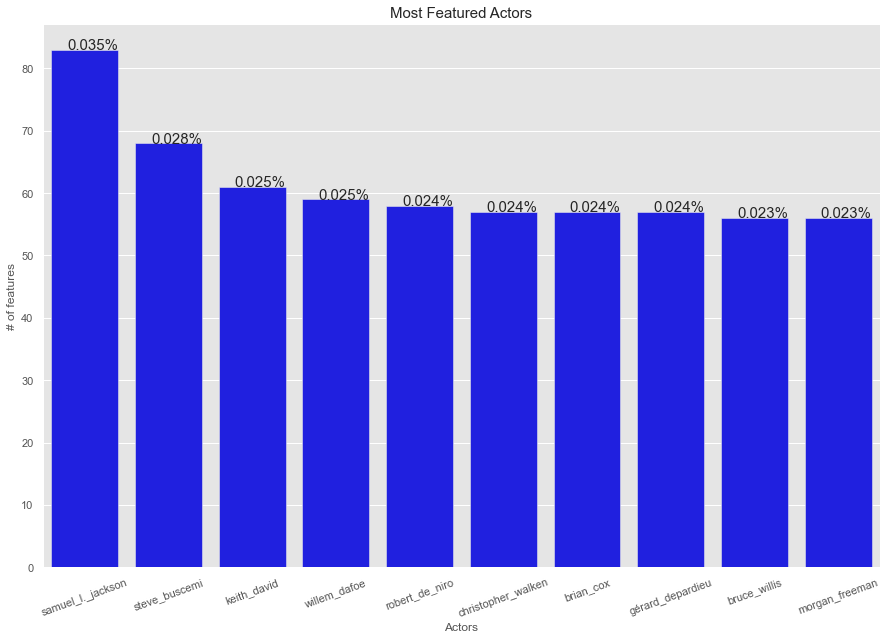

In [102]:
ax = sns.barplot(most_featured_actors_10['actors'], most_featured_actors_10['# of features'], color='blue')
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/ sum(featured_actors.values()))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', fontsize=15)

plt.xticks(rotation=20)
plt.xlabel('Actors')
plt.ylabel('# of features')
plt.title("Most Featured Actors", fontsize=15)
plt.show()

**ANSWER 4**

**Samuel L Jackson** has been featured the most; great guy! 

The list features top-rated stars, hence we can say that top-rated stars get featured the most.

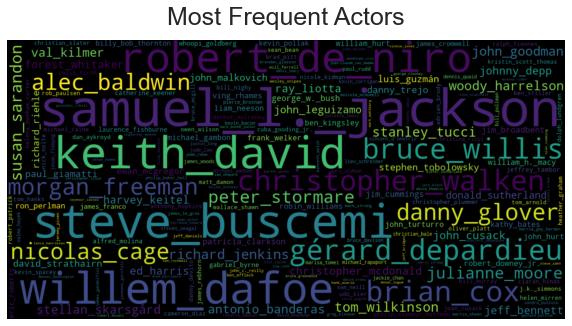

In [103]:
word_cloud(featured_actors, 'actors')

This plot shows clearly the frequency of appearance of each actor.

Next, we will look at the top 10 directors with the most movies directed.

In [104]:
# Question 5: Director with the most movies?

featured_directors = get_top_n(imdb_copy['director'], col='director')[1]
most_featured_directors_10 = get_top_n(imdb_copy['director'], col='director')[0]

print(f"There are {len(set(featured_directors.keys()))} directors in total")
most_featured_directors_10

There are 11786 directors in total


,director,# of features
0,see_full_summary,28
1,woody_allen,26
2,luc_besson,26
3,stephen_king,24
4,william_shakespeare,19
5,ki-duk_kim,17
6,lars_von_trier,15
7,tyler_perry,15
8,robert_rodriguez,14
9,takeshi_kitano,14


**ANSWER 5**

**See_Full_Summary**, either that's a weird name from Europe or it means there's no data for director provided for these rows. We will run with the latter and replace this value with something we can work with. But, **Woody Allen**, **Luc Besson** and **Stephen King** are up there too.

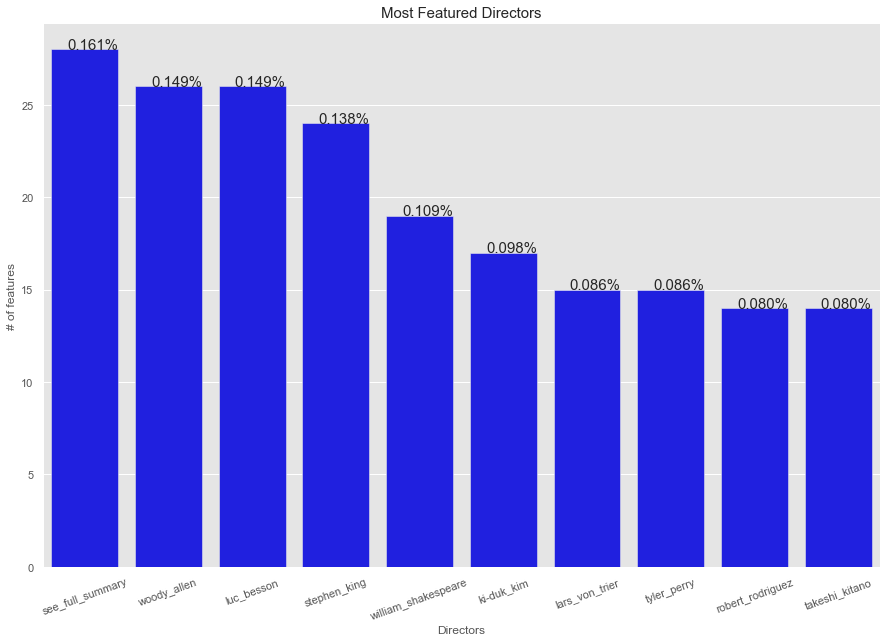

In [105]:
ax = sns.barplot(most_featured_directors_10['director'], most_featured_directors_10['# of features'], color='blue')
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/ sum(featured_directors.values()))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', fontsize=15)

plt.xticks(rotation=20)
plt.xlabel('Directors')
plt.ylabel('# of features')
plt.title("Most Featured Directors", fontsize=15)
plt.show()

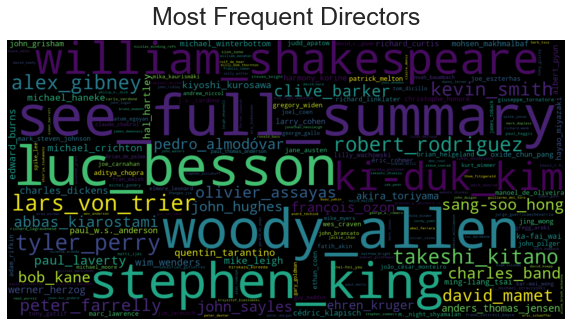

In [106]:
word_cloud(featured_directors, 'directors')

In [107]:
# Question 6: What plot keywords are most frequent?

keywords = get_top_n(imdb_copy['plot_keywords'], col='keywords')
keywords_10 = keywords[0]
featured_keywords = keywords[1]

print(f"There are {len(set(featured_keywords.keys()))} keywords in total")
keywords_10

There are 10578 keywords in total


,keywords,# of features
0,female,1762
1,nudity,1655
2,title,1626
3,character,1353
4,male,1246
5,sex,981
6,woman,849
7,relationship,775
8,film,755
9,man,575


**ANSWER 6**

**Female**, **Nudity** & **Title** make up the top three most frequent keywords

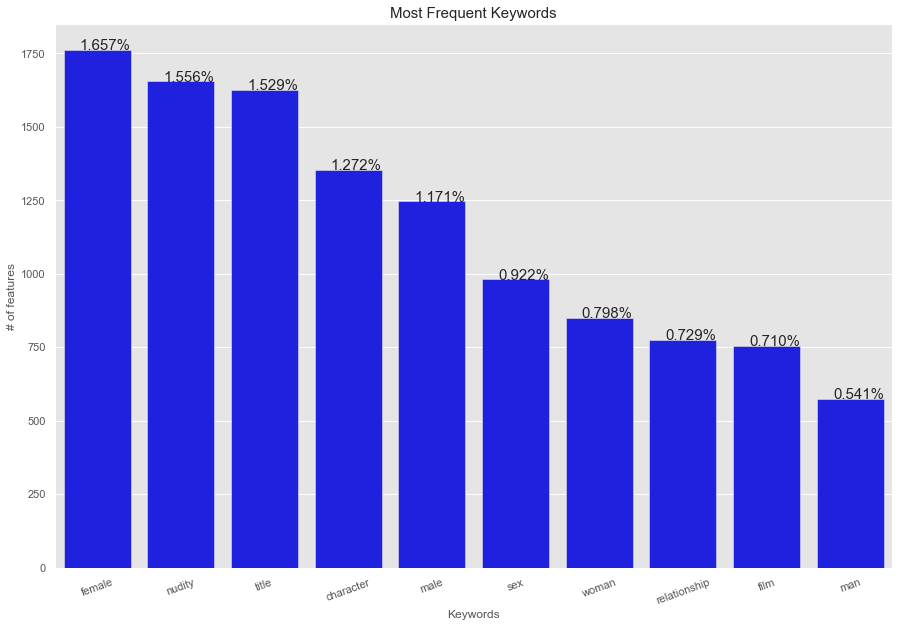

In [108]:
ax = sns.barplot(keywords_10['keywords'], keywords_10['# of features'], color='blue')
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/ sum(featured_keywords.values()))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', fontsize=15)

plt.xticks(rotation=20)
plt.xlabel('Keywords')
plt.ylabel('# of features')
plt.title("Most Frequent Keywords", fontsize=15)
plt.show()

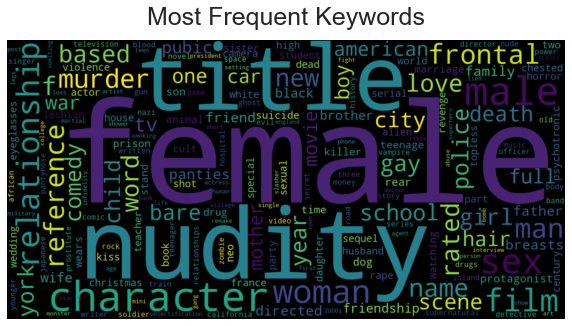

In [109]:
word_cloud(featured_keywords, 'keywords')

The word cloud paints a clear picture of what words occur most in movies plot_keywords

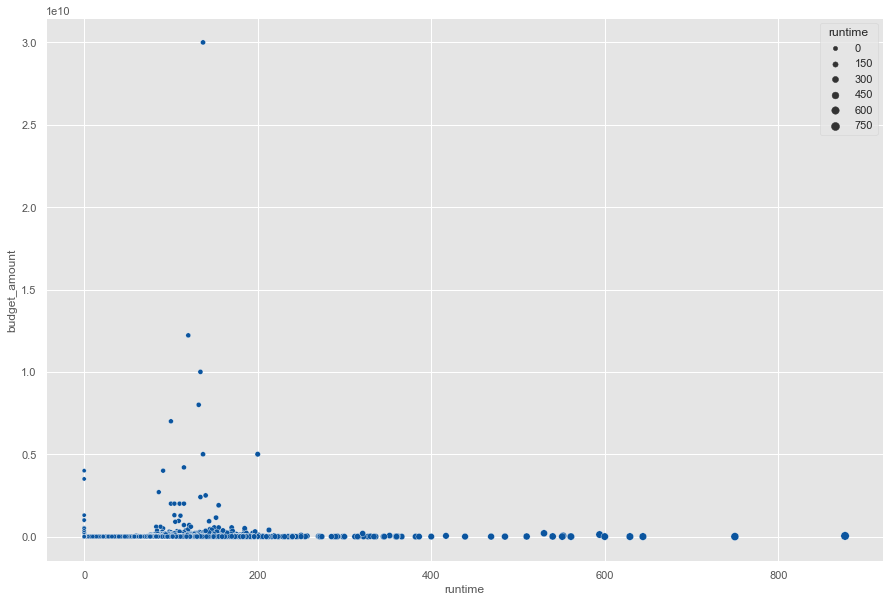

In [110]:
# Question 8: Does runtime influence budget?

# for this task, we will create a scatter plot of runtime and budget

sns.scatterplot(x=imdb_copy['runtime'].fillna(0), y=imdb_copy['budget_amount'].fillna(0), size=imdb_copy['runtime'].fillna(0))
plt.show()

Well, we can't confidently say there's any relationship between runtime and budget. There's also an outlier wayyy up there.

Let's confirm this by looking at the correlation figures

In [111]:
imdb_copy[['runtime', 'budget_amount']].corr()

,runtime,budget_amount
runtime,1.000000,0.055205
budget_amount,0.055205,1.000000


**ANSWER 7**

The correlation between runtime and budget_amount is __0.055__ which practically means theres no correlation between runtime and budget_amount.

A possible explanation for this phenomenon: Recall that there are alot of missing values in the budget column which we filled with Zeros, skewing the data.

In [112]:
# Question 8: How many movies are represented by this dataset?

print(f'There are {imdb_copy["movieId"].nunique()} movies in the dataset')

There are 27278 movies in the dataset


We are done with exploring the Imdb_data. We have seen who the most featured actors are and which director has directed the highest number of movies, what the most common plot keywords are and if there's a relationship between the budget and the movie runtime.

What about the most common genres? and the most prolific year of production? Let's unearth these from the movies dataset.

#### 2. MOVIES DATA

In [113]:
# let's see what we have to work with
movies_copy.head(3)

,movieId,title,genres,year
0,1,toy story,adventure animation children comedy fantasy,1995.0
1,2,jumanji,adventure children fantasy,1995.0
2,3,grumpier old men,comedy romance,1995.0


Let's set outline questions that require answers from this dataset.

Agenda:

1. What are the most common genres?
    - How many genres are there?
2. What year are the most movies released?
3. what is the total number of unique movies represented in the dataset

In [114]:
# Question 1: What are the most common genres?

genres = get_top_n(movies_copy['genres'], col='genres')
genres_10 = genres[0]
featured_genres = genres[1]

print(f'There are {len(featured_genres.keys())} genres in total.')
genres_10

There are 22 genres in total.


,genres,# of features
0,drama,25606
1,comedy,16870
2,thriller,8654
3,romance,7719
4,action,7348
5,horror,5989
6,documentary,5605
7,crime,5319
8,(no,5062
9,genres,5062


**ANSWER 1**

There are a lot of movies that **drama**, followed by **comedy** and **thriller** and there are __22__ genres in total

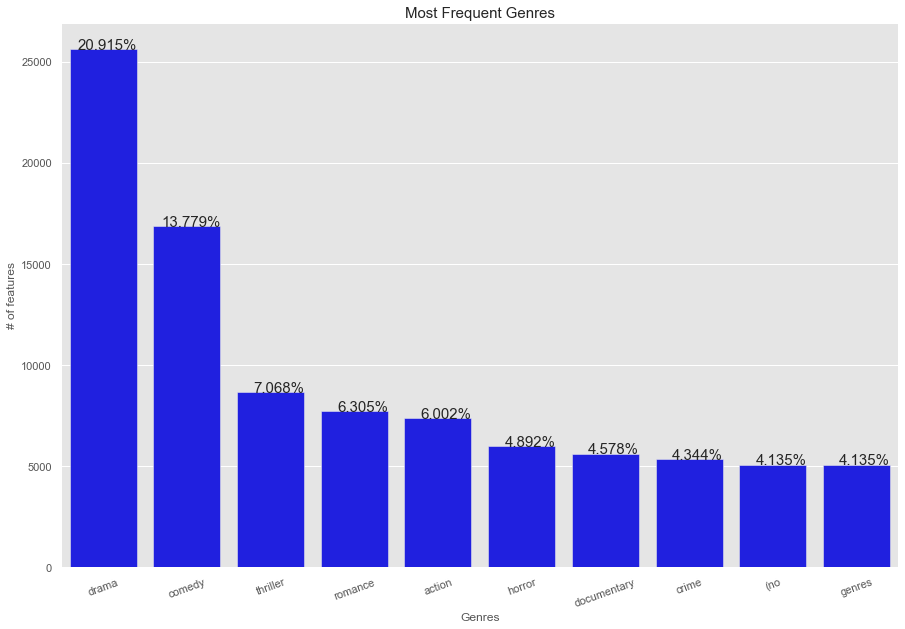

In [115]:
ax = sns.barplot(genres_10['genres'], genres_10['# of features'], color='blue')
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/ sum(featured_genres.values()))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', fontsize=15)

plt.xticks(rotation=20)
plt.xlabel('Genres')
plt.ylabel('# of features')
plt.title("Most Frequent Genres", fontsize=15)
plt.show()

Here we see clearly by how much **drama** __20.915%__ and **comedy** __13.997%__ lead the pack. Not minding the tail end '(no and genres' as they are one but got caught, unfortunately, in a split() operation. Nonetheless, we will need to replace these values appropriately.

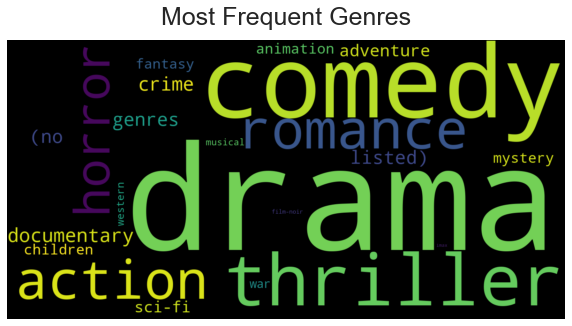

In [116]:
word_cloud(featured_genres, 'genres')

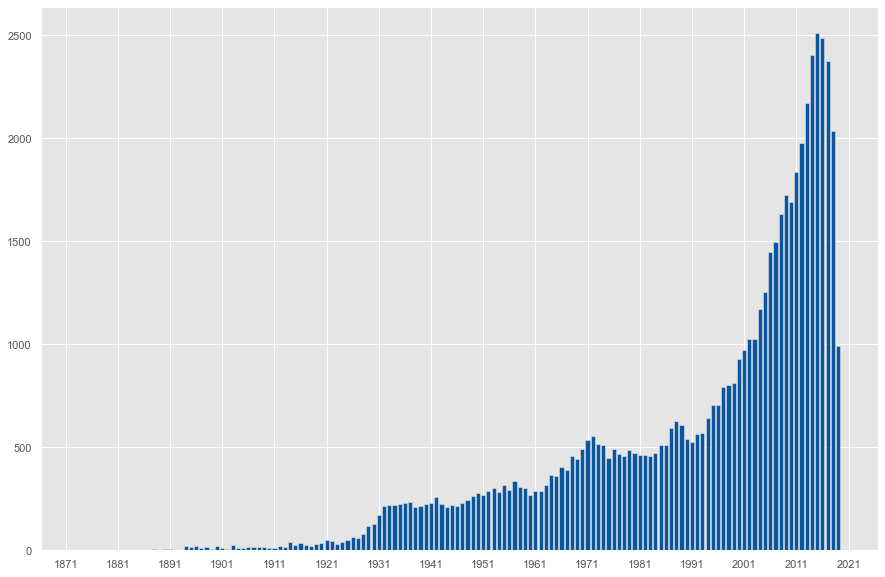

In [117]:
# Question 2: What year are the most movies released?

year_count = movies_copy.groupby('year')['year'].count()

fig, ax = plt.subplots()
ax.set_xticks(np.arange(min(year_count.values),max(year_count.values),10))
ax.bar(year_count.index, year_count.values)
plt.show()

In [118]:
year_count.sort_values(ascending=False).head(20)

year
2015.0    2513
2016.0    2488
2014.0    2406
2017.0    2374
2013.0    2173
2018.0    2034
2012.0    1978
2011.0    1838
2009.0    1724
2010.0    1691
2008.0    1632
2007.0    1498
2006.0    1446
2005.0    1255
2004.0    1172
2003.0    1028
2002.0    1024
2019.0     994
2001.0     971
2000.0     929
Name: year, dtype: int64

**ANSWER 2**

We can see that the number of the movies released increased over time and peeked in the year __2015__ with __2,513__ movies, then there's a gradual descent from __2016__ and it becomes abrupt in __2019__ - we can credit this to the Coronavirus Pandemic.

In [119]:
# Question 3: How many movies are there in the dataset?

print(f"There are {movies_copy['movieId'].nunique()} movies in the dataset")

There are 62423 movies in the dataset


In this section, we have been able to drilldown a bit into the movies dataset and see what story it tells. Next we will be exploring the meta_data dataset which holds features contained in the movies dataset with a bit more information.

#### 3. META DATA

In [120]:
# As usual, let's see what we are working with

meta_copy.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdbId,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,True,30000000.0,animation comedy family,http://toystory.disney.com/toy-story,862,114709.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,en,Released,NaN,toy story,False,7.7,5415.0,1995.0
1,False,False,65000000.0,adventure fantasy family,NaN,8844,113497.0,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,en fr,Released,Roll the dice and unleash the excitement!,jumanji,False,6.9,2413.0,1995.0
2,False,True,NaN,romance comedy,NaN,15602,113228.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,en,Released,Still Yelling. Still Fighting. Still Ready for...,grumpier old men,False,6.5,92.0,1995.0


There's a lot to unearth from this data;

1. We will look at how many movies belong to a collection
2. The spoken languages distribution
3. How original_language differ from spoken languages
4. How original_title differs from the title
5. Correlation between budget, revenue and runtime
6. Correlation between runtime, vote average

But first, we will look at the descriptive statistics of both the numerical and the categorical variables

In [121]:
meta_copy.describe()

,budget,imdbId,popularity,revenue,runtime,vote_average,vote_count,year
count,8889.0,4.543600e+04,45447.000000,4.544700e+04,45190.000000,45447.000000,45447.000000,45366.000000
mean,21606496.0,9.924239e+05,2.921509,1.121254e+07,94.124696,5.618199,109.918256,1991.803589
std,34311988.0,1.361717e+06,6.006018,6.434117e+07,38.411790,1.924198,491.378000,28.948393
min,1.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,2000000.0,8.297750e+04,0.385944,0.000000e+00,85.000000,5.000000,3.000000,1978.000000
50%,8000000.0,2.831250e+05,1.127513,0.000000e+00,95.000000,6.000000,10.000000,2001.000000
75%,25000000.0,1.536049e+06,3.679023,0.000000e+00,107.000000,6.800000,34.000000,2010.000000
max,380000000.0,7.158814e+06,547.488281,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000


This table presents us some interesting statistics...

The meta_data budget column has 8889 values compare to 7409 of the budget column in Imdb data. There's an average of __21 Million__ spent on movies, a minimum of __1__ and a maximum of __380 Million__, which is fair compared to Imdb's __30 Billion__.

The average popularity index of a movie is __2.92__, a minimum of __0__ and a maximum of __547__, indicative of an outlier. We will need to transform this column either by log(1+y) transformation or by taking the square root of each observation.

There does not seem to be much going on with revenue, so we will skip it for now.

Average runtime for movies in this dataset is __94__ minutes, a minimum of __0__, or perhaps 'no entry' and a maximum of __1256__ mins(**approx 21hours!** yikes!)

Average vote_average is __5.6__, with a minimum of __1__ and a maximum of __10__ indicating a range of values from **0 - 10**.

Vote_count ranges from __0__ minimum to __14,075__ maximum with a mean of __110__. Year has a minimum of 1, a year we are very certain that motion picture had not be thought of, even remotely and maximum of __2020__. The mean year is __1992__, 30 years ago.

We have noted a few anomalies that needs taking care of, and we will do that in `Feature Engineering`

In [122]:
meta_copy.describe(include='object')

,adult,genres,homepage,id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,video
count,45453,45453,7780,45453,45442,45453,44499,45067,45447,45447,45366,45447,45366,20408,45447,45447
unique,5,4069,7673,45436,92,43373,44307,45024,22646,2390,17336,1931,6,20283,42227,2
top,False,drama,http://www.georgecarlin.com,265189,en,Hamlet,No overview found.,/5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg,,united_states_of_america,2008-01-01,en,Released,Based on a true story.,cinderella,False
freq,45441,4999,12,2,32262,8,133,5,11872,17849,136,22391,45002,7,11,45354


In [123]:
meta_copy['adult'].unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

Here we see that there are more non-adult films than there are adult ones. Drama takes the lead in the genres category, Most movies are 'english' movies which can be explained by the fact that a large chunk of these movies are produced in the United States of America. Cinderella has been produced more times than any other movie with 11 remakes. There are __42, 277__ unique movies in this dataset


Many of the columns in this dataset will be of no use to our algorithm, and as such, will be discarded in `feature engineering`

Let's go on with out set agenda for the data


In [124]:
# Question 1: how many movies belong to a collection?

collection = meta_copy['belongs_to_collection'].value_counts()
collection

False    40959
True      4494
Name: belongs_to_collection, dtype: int64

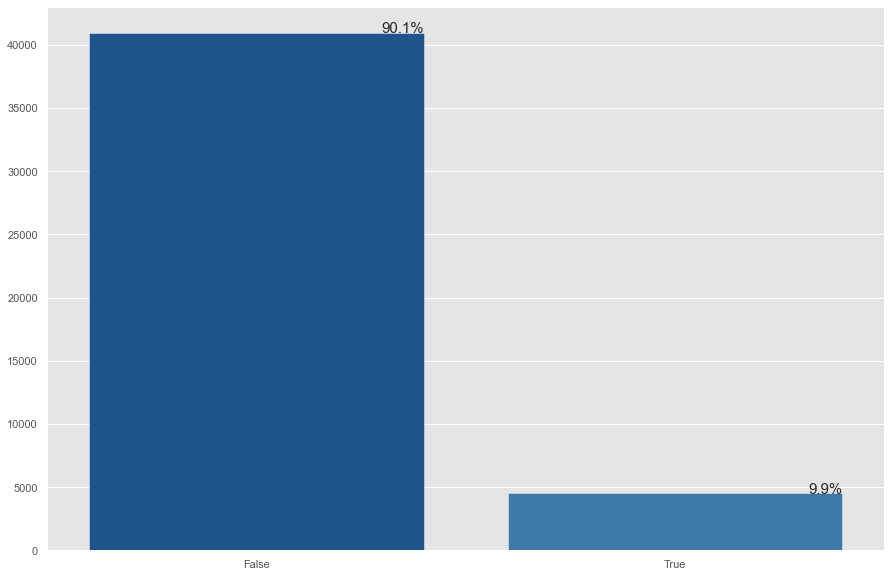

In [125]:
ax = sns.barplot(collection.index, collection.values)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(meta_copy['belongs_to_collection'].tolist()))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', fontsize=15)
plt.show()

**ANSWER 1**

False has a big chunk of this with __40,959__ values making up __90.1%__ of the entire column. This means that many movies do not belong to a collection i.e have sequels of part of a franchise.

In [126]:
# Question 2: What is the spoken languages distribution?
meta_copy['spoken_languages'] = meta_copy['spoken_languages'].fillna('')
languages_set = get_top_n(meta_copy['spoken_languages'], col='languages')
languages = languages_set[1]
languages_10 = languages_set[0]

print(f'There are {len(languages.keys())} languages in total.')

languages_10

There are 133 languages in total.


,languages,# of features
0,en,28740
1,fr,4195
2,de,2624
3,es,2413
4,it,2367
5,ja,1758
6,ru,1563
7,zh,790
8,hi,706
9,pt,591


The languages are encoded and difficult to read. To solve this, we will employ a dataset that contains the names that match correctly to these language codes.

In [128]:
language_map = pd.read_csv('resources/data/language-codes.csv')
language_map.head()

,alpha2,English
0,aa,Afar
1,ab,Abkhazian
2,ae,Avestan
3,af,Afrikaans
4,ak,Akan


In [129]:
languages_df = pd.DataFrame.from_dict(languages, orient='index').reset_index()\
                .rename(columns={'index':'language_code', 0: '# of features'})
languages_df = languages_df.merge(language_map, how='left', left_on='language_code', right_on='alpha2')
languages_df.head(3)

,language_code,# of features,alpha2,English
0,en,28740,en,English
1,fr,4195,fr,French
2,de,2624,de,German


In [130]:
languages_df = languages_df.dropna()
languages = dict(zip(languages_df['English'].tolist(), languages_df['# of features'].tolist()))
languages_10 = pd.DataFrame.from_dict(dict(list(languages.items())[:10]), orient='index').reset_index()\
                .rename(columns={'index':'languages', 0:'# of features'})

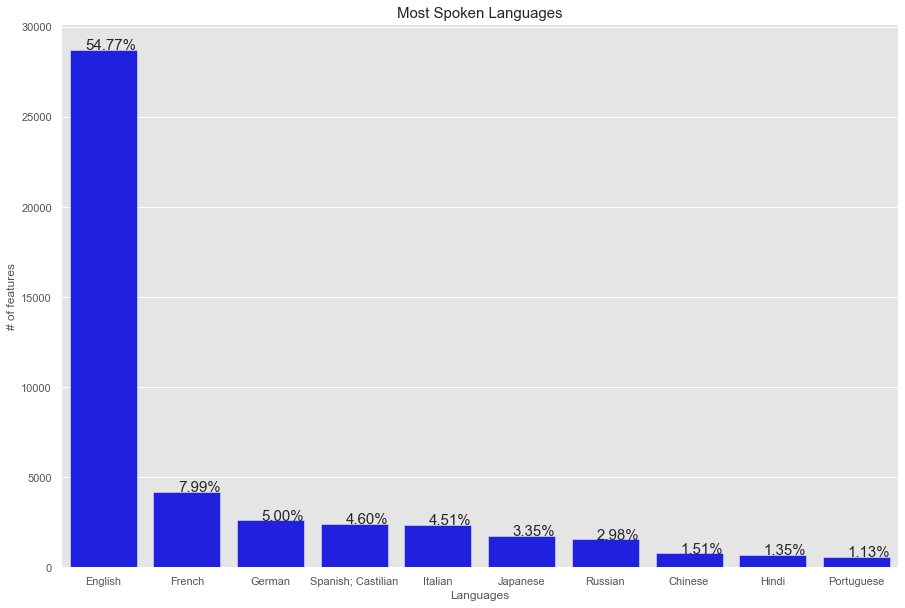

In [131]:
ax = sns.barplot(languages_10['languages'], languages_10['# of features'], color='blue')

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/ sum(languages.values()))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', fontsize=15)

plt.xticks(rotation=0)
plt.xlabel('Languages')
plt.ylabel('# of features')
plt.title("Most Spoken Languages", fontsize=15)
plt.show()

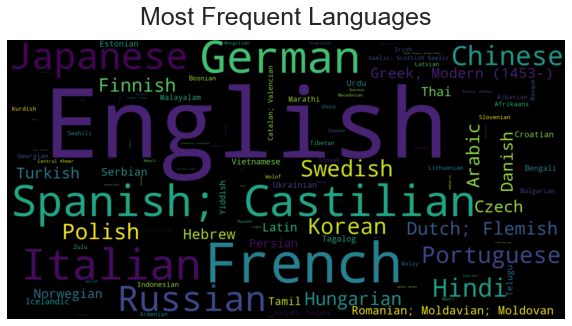

In [132]:
word_cloud(languages, 'Languages')

**ANSWER 2**

The English language is the most spoken language in movies, being spoken in roughly __55%__ of movies, followed by French in __8%__ of movies and German in __5%__ of movies. This is not surprising as English Language is the language of the world and it will only make sense to have more movies in that language.

In [133]:
# Question 3: How original_language differ from spoken languages

# using the `~` sign to negate .isin() 
diff = meta_copy[['original_language', 'spoken_languages']][~meta_copy['original_language'].isin(meta_copy['spoken_languages'])]

diff

,original_language,spoken_languages
7279,ab,en fr ro es
9640,bm,bm fr
12374,bm,bm fr
12549,ab,en
13615,ab,
14444,bm,bm ff
19574,NaN,de en
19730,104.0,
20394,qu,qu es
21602,NaN,en


**ANSWER 3**

`Spoken_languages` looks to be a more useable column than `original_language` because some data points contain more than 1 language. This will be very useful for a recommender system

In [134]:
# Question 4: How original_title differs from the title

diff = meta_copy[['original_title', 'title']][~meta_copy['original_title'].str.lower().isin(meta_copy['title'])]

diff

,original_title,title
28,La Cité des Enfants Perdus,the city of lost children
29,摇啊摇，摇到外婆桥,shanghai triad
32,"Guillaumet, les ailes du courage",wings of courage
57,Il postino,the postman
58,Le confessionnal,the confessional
...,...,...
45453,Maa,mom
45455,San Michele aveva un gallo,st. michael had a rooster
45461,رگ خواب,subdue
45462,Siglo ng Pagluluwal,century of birthing


**ANSWER 4**

Notice that the **original_title** has some titles written in the original dialect of the country they were produced in, **title** on the other hand has the English translated version of such movie titles, so we're keeping that.

In [135]:
# Question 5: Correlation between budget, revenue and runtime
meta_copy[['budget', 'revenue', 'runtime']].corr()

,budget,revenue,runtime
budget,1.000000,0.740050,0.223345
revenue,0.740050,1.000000,0.103937
runtime,0.223345,0.103937,1.000000


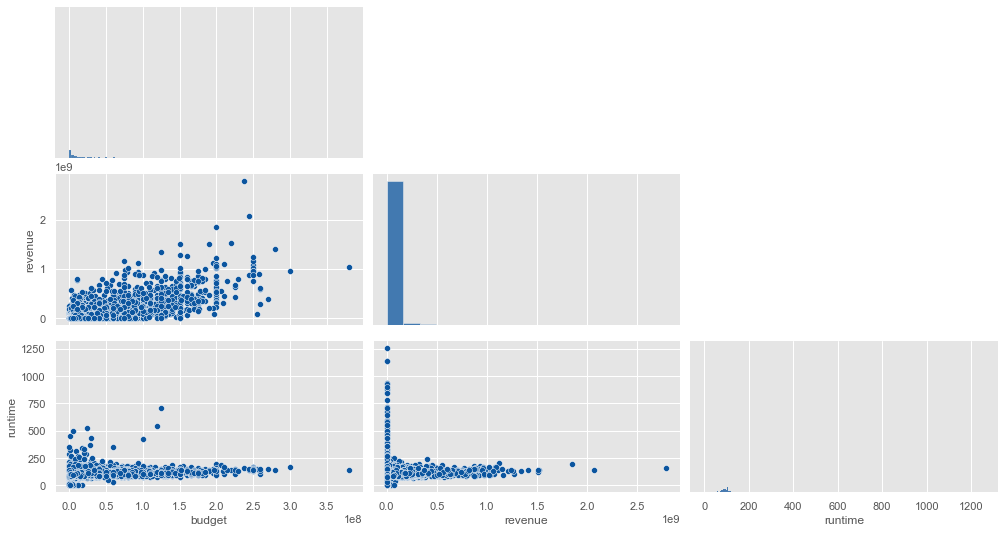

In [136]:
g = sns.pairplot(meta_copy[['budget', 'revenue', 'runtime']], corner=True)
# g.fig.set_figheight(10)
g.fig.set_figwidth(15)
plt.show()

**ANSWER 5**

There appears to be a strong relationship between __budget__ and __revenue__. From the plot, we can say that the higher the budget, the higher the revenue. 

There's a very weak relationship between runtime and the other variables

In [137]:
# Question 6: Correlation between runtime, vote average, vote count

meta_copy[['runtime', 'vote_average', 'vote_count']].corr()

,runtime,vote_average,vote_count
runtime,1.000000,0.158188,0.113555
vote_average,0.158188,1.000000,0.123615
vote_count,0.113555,0.123615,1.000000


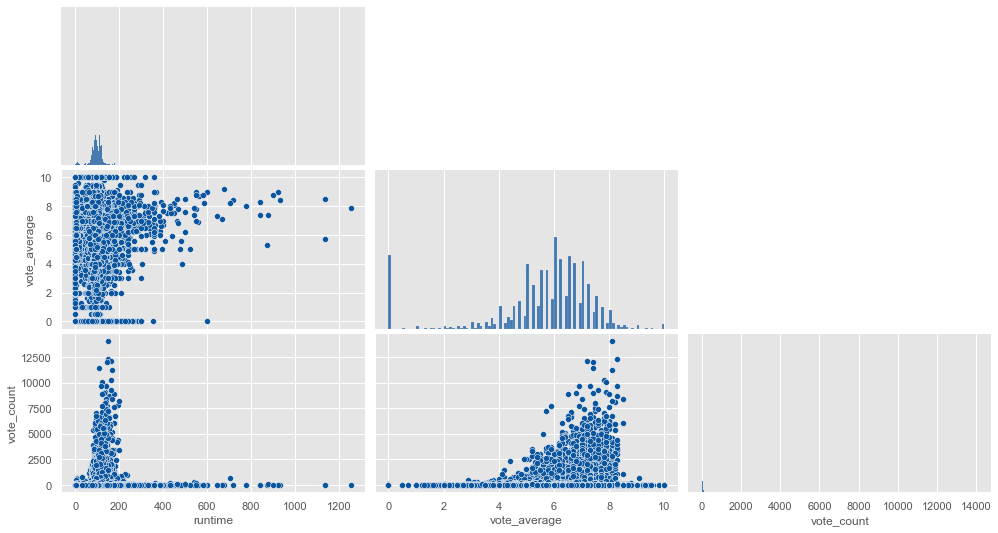

In [138]:
g = sns.pairplot(meta_copy[['runtime', 'vote_average', 'vote_count']], corner=True)
# g.fig.set_figheight(10)
g.fig.set_figwidth(15)
plt.show()

**ANSWER 6**

There are no meaningful relationships to observe here as all correlation values between variables are closer to __0__.

An interesting analysis will be to find out if there's a relationship between the number of top rated stars in a movie and the budget for the movie. Let us find out!

First we will define a custom class to help us breakdown the title_cast column of Imdb data and create an arbitrary star rating based solely on number of appearances in movies.

##### BRINGING BACK IMDB DATA FOR A BIT

In [139]:
# engineer a_list_actors, b_list_actors, c_list_actors

def classify(df, col, columns=[], threshold=[]):
    # get the featured items into a dictionary
    most_featured = aggregate(df[col])
    # convert the dictionary into a pd.DataFrame
    most_featured_df = pd.DataFrame.from_dict(most_featured.items())
    # change the column names
    most_featured_df.columns = columns

    print('feature extraction complete')
    
    # classify based on threshold supplied
    a_list_actors = most_featured_df[columns[0]][most_featured_df[columns[1]] >= threshold[0]].tolist()
    b_list_actors = most_featured_df[columns[0]][(most_featured_df[columns[1]] >= threshold[1]) & (most_featured_df[columns[1]] < threshold[0])].tolist()
    c_list_actors = most_featured_df[columns[0]][most_featured_df[columns[1]] < threshold[1]].tolist()
    
    # initialise empty lists to save counts of items 
    # per row
    a_list_count = []
    b_list_count = []
    c_list_count = []
    
    # iterate over each row in the column
    for row in df[col]:
        a_counter = 0
        b_counter = 0
        c_counter = 0
        
        # get every item in a row
        for item in row:
            # do conditional checking
            # to know which class each
            # item is in and append a count
            # to the appropriate quarters
            if item in a_list_actors:
                a_counter += 1
            if item in b_list_actors:
                b_counter += 1
            if item in c_list_actors:
                c_counter += 1
        
        # append a count to the empty list initialised
        a_list_count.append(a_counter)
        b_list_count.append(b_counter)
        c_list_count.append(c_counter)

    return (a_list_count, b_list_count, c_list_count)

In [140]:
temp_df = imdb_copy.copy(deep=True)
temp_df['title_cast'] = temp_df['title_cast'].apply(lambda row: row.split() if type(row) ==str else '[]')
a, b, c = classify(temp_df, 'title_cast', columns=['actor', '# of features'], threshold=[30, 15])
temp_df['a_stars']  = a

temp_df.head(3)

feature extraction complete


,movieId,title_cast,director,runtime,budget,plot_keywords,budget_amount,symbol,a_stars
0,1,"[tom_hanks, tim_allen, don_rickles, jim_varney...",john_lasseter,81.0,$30000000,toy rivalry cowboy cgi animation,30000000.0,$,2
1,2,"[robin_williams, jonathan_hyde, kirsten_dunst,...",jonathan_hensleigh,104.0,$65000000,board game adventurer fight game,65000000.0,$,3
2,3,"[walter_matthau, jack_lemmon, sophia_loren, an...",mark_steven_johnson,101.0,$25000000,boat lake neighbor rivalry,25000000.0,$,1


In [145]:
temp_df[['budget_amount', 'a_stars']].corr()

,budget_amount,a_stars
budget_amount,1.000000,0.001351
a_stars,0.001351,1.000000


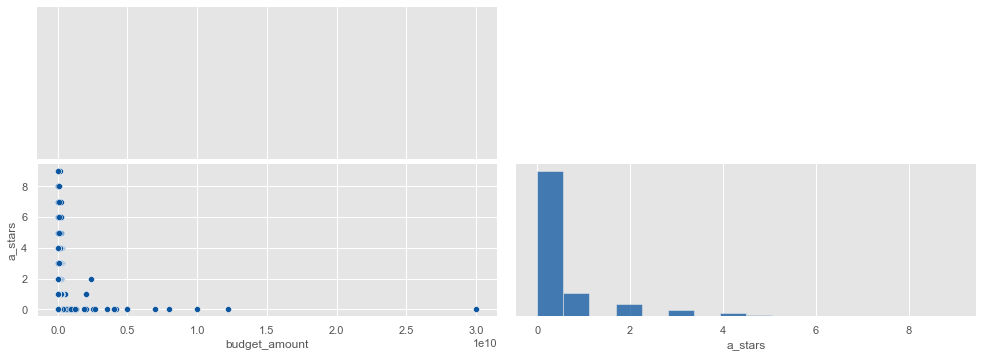

In [148]:
g = sns.pairplot(temp_df[['budget_amount', 'a_stars']], corner=True)
# g.fig.set_figheight(10)
g.fig.set_figwidth(15)
plt.show()

Shocking as there seems to be absolutely no relationship between budget for a movie and the number of superstars in the movie. This can be misleading as there may be budget amounts in other currencies than the US Dollar that will appear to be higher/or lower than the actual amount in US Dollar. 

Let's fillter the dataset for only budget denoted in dollars and perform the correlation again.

In [150]:
temp_df2 = temp_df[temp_df['symbol'] == '$']

temp_df2.shape

(6426, 9)

Okay, now we have roughly __6,400__ rows of data

In [151]:
temp_df2[['budget_amount', 'a_stars']].corr()

,budget_amount,a_stars
budget_amount,1.000000,0.382319
a_stars,0.382319,1.000000


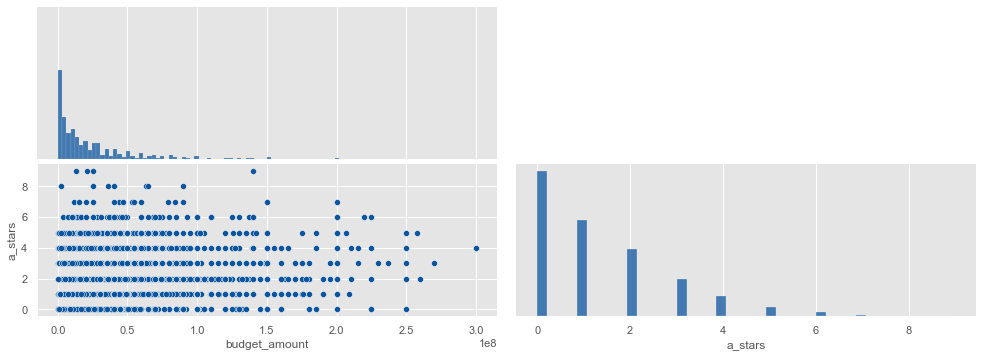

In [152]:
g = sns.pairplot(temp_df2[['budget_amount', 'a_stars']], corner=True)
# g.fig.set_figheight(10)
g.fig.set_figwidth(15)
plt.show()

While there's an improvement in the correlation values when considering only budgets denoted in US Dollars, it is still a weak relationship and nothing much can be made of it. Perhaps, during `Feature engineering`, after converting all currencies to the dollar, we can get a different result (if eventually we choose to work with this dataset or the column)

Which companies produce the most movies and in which country are most movies produced?

In [153]:
# Companies that produce the most movies

top_n = get_top_n(meta_copy['production_companies'].dropna(), n=20, col='company')

all_companies = top_n[1]
top_20_companies = top_n[0]

top_20_companies

,company,# of features
0,warner_bros.,1250
1,metro-goldwyn-mayer_(mgm),1075
2,paramount_pictures,1003
3,twentieth_century_fox_film_corporation,836
4,universal_pictures,830
5,columbia_pictures_corporation,448
6,canal+,437
7,columbia_pictures,431
8,rko_radio_pictures,290
9,united_artists,279


Warner Bros. has produced the most movies in this dataset with a total of __1,250__ movies produced, followed closely by Metro Goldwyn Meyer with __1,075__, then Paramount Pictures with __1,003__.

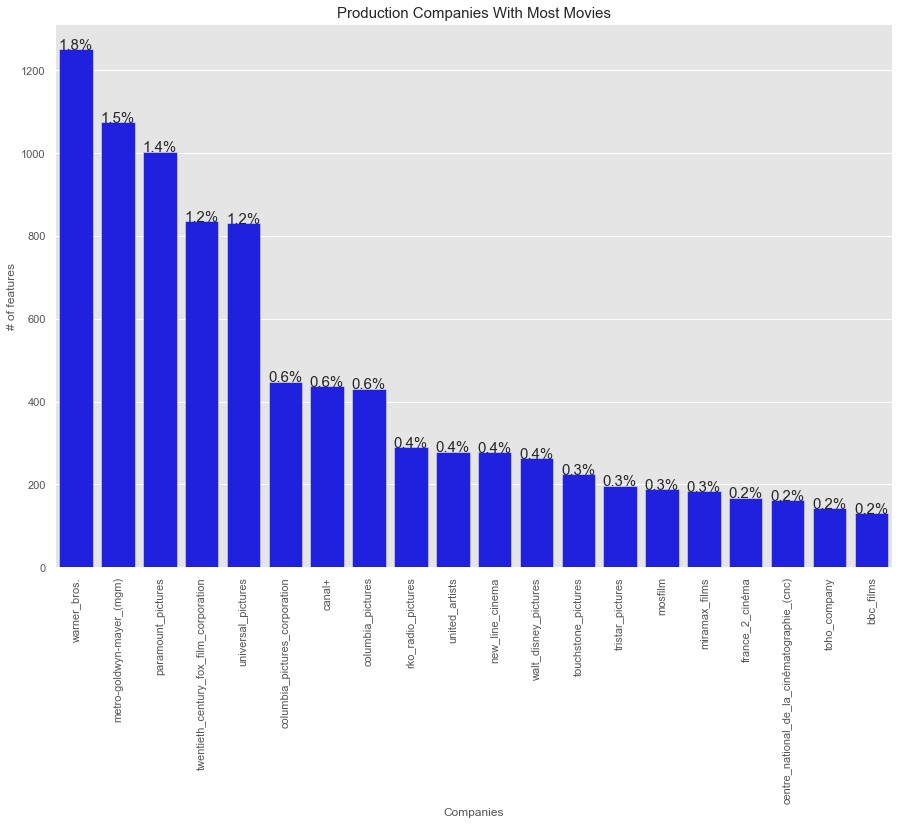

In [154]:
ax = sns.barplot(top_20_companies['company'], top_20_companies['# of features'], color='blue')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ sum(all_companies.values()))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', fontsize=15)

plt.xticks(rotation=90)
plt.xlabel('Companies')
plt.ylabel('# of features')
plt.title("Production Companies With Most Movies", fontsize=15)
plt.show()

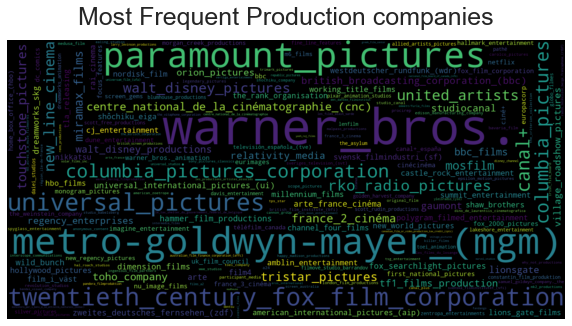

In [155]:
word_cloud(all_companies, 'Production Companies')

In [156]:
# Countries with the most movies produced in

top_n = get_top_n(meta_copy['production_countries'].dropna(), n=20, col='countries')

all_countries = top_n[1]
top_20_countries = top_n[0]

top_20_countries

,countries,# of features
0,united_states_of_america,21150
1,united_kingdom,4091
2,france,3936
3,germany,2250
4,italy,2168
5,canada,1765
6,japan,1648
7,spain,964
8,russia,912
9,india,827


Most of the movies were produced in the United States of America with a whooping __21,150__ movies, which is not a surprise as the US is a powerhouse in the movie industry, followed by the United Kingdom with a meager __4,091__ movies and France with __3,936__ movies

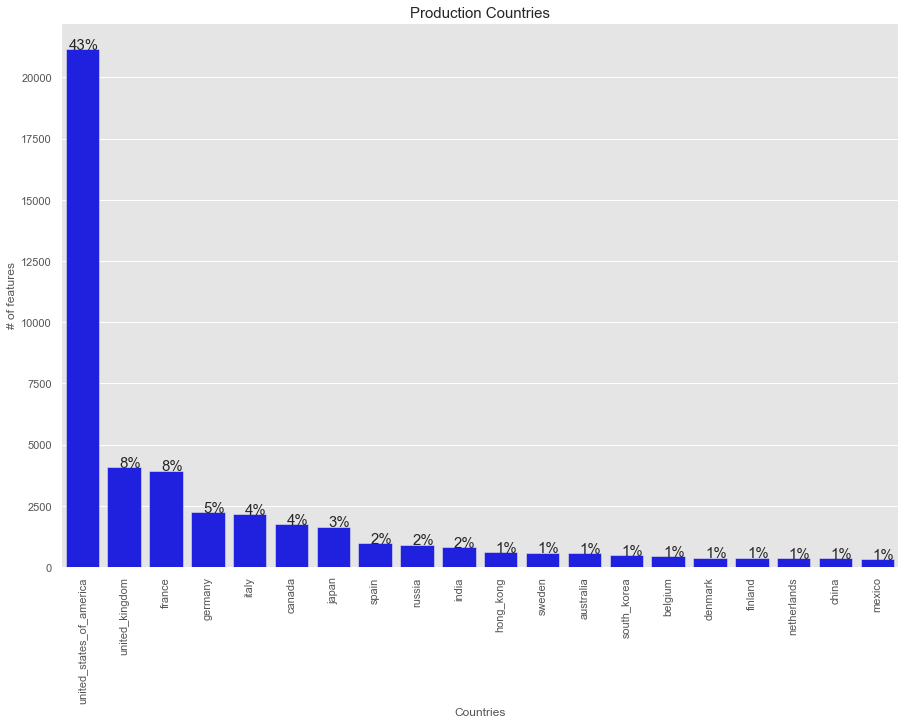

In [157]:
ax = sns.barplot(top_20_countries['countries'], top_20_countries['# of features'], color='blue')

for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/ sum(all_countries.values()))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', fontsize=15)

plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('# of features')
plt.title("Production Countries", fontsize=15)
plt.show()

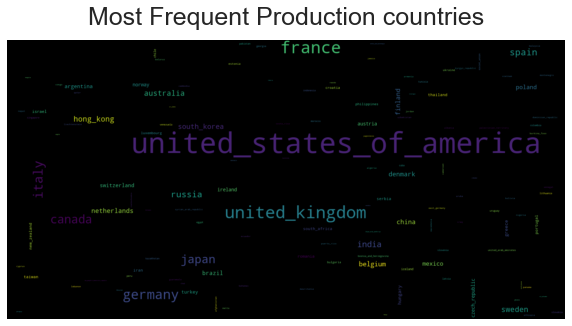

In [158]:
word_cloud(all_countries, "Production Countries")

This is telling of the magnitude of difference between the united states and other countries

In [159]:
del temp_df, temp_df2

We are now done with exploring the meta_data dataset. In this section, we looked at the distribution of some certain features, how some features differ from similar features and determined the relationship between two or more numeric features. We found that budget and revenue have a moderately positive relationship, so it is either we drop one column or engineer a new feature from both columns (Profit, for example).

Next we explore genome_scores and genome_tags

#### 4. GENOME SCORES AND GENOME TAGS

In [160]:
# show the head of the genome_scores
genome_scores.head(3)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250


**Questions:**

1. How many unique movies are in the dataset
2. How many unique tags are in the dataset
3. What are the Average, Minimum and Maximum relevance scores

In [161]:
# Question 1: How many unique movies are in the dataset
print(f"There are {genome_scores['movieId'].nunique()} unique movies in the dataset")

There are 13816 unique movies in the dataset


**ANSWER 1:**

There are **13,816** unique movies in the dataset

In [162]:
# Question 2: How many unique tags are in the dataset
print(f"There are {genome_scores['tagId'].nunique()} unique tags in the dataset")

There are 1128 unique tags in the dataset


**ANSWER 2:**

There are **1,128** unique tags in the dataset

In [163]:
# descriptive statistics
genome_scores['relevance'].describe()

count    1.558445e+07
mean     1.118807e-01
std      1.497531e-01
min      2.500000e-04
25%      2.400000e-02
50%      5.650000e-02
75%      1.407500e-01
max      1.000000e+00
Name: relevance, dtype: float64

**ANSWER 3:**

The average relevance score is __0.116__, a minimum of __0.00025__ and a maximum of __100__ indicating that the scale of relevance is from __0% - 100%__. There, apparently, are a lot of low rated tags, with a relevance score of __0.14%__ being higher than __75%__ of the data. Only the most relevant tags (at a certain threshold) should be considered. This will be addressed in `Feature Engineering`

In [164]:
# view genome tags
genome_tags.head(3)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century


In [165]:
# descriptive statistics
genome_tags.describe(include='category')

,tag
count,1128
unique,1128
top,007
freq,1


There are __1,128__ rows, with __1,128__ unique values. Nothing much to gain from this. We will. nevertherless, look deeper when we merge the two dataframes in `Feature Engineering`.


We will take a look at the train dataset which contains the movie ratings and the users that provided the ratings next.

#### 5. TRAIN (RATINGS) DATASET

In [166]:
train.head(3)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539


In [167]:
# Descriptive statistics
train.describe()

,userId,movieId,rating,timestamp
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.540094e+00,1.215677e+09
std,4.679359e+04,3.919578e+04,1.036790e+00,2.268921e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.197000e+03,3.000000e+00,1.011742e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199019e+09
75%,1.215790e+05,8.630000e+03,4.000000e+00,1.447242e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


We can deduce that there are __10 Million__ rows of data for each column, meaning no missing data as we've established when we took a <a href="#sneak-peek">sneak peek</a> into the data earlier.

**QUESTIONS**

1. How many unique users are represented in the dataset
2. How many movies were rated in the dataset
3. What are the Mean, Minimum and Maximum ratings

In [168]:
# Question 1: How many unique users are represented in the dataset

print(f"There are {train['userId'].nunique()} users in the dataset")

There are 162541 users in the dataset


**ANSWER 1:**

There are __162,541__ unique users in the dataset

In [169]:
# Question 2: How many movies were rated in the dataset

print(f"There are {train['movieId'].nunique()} movies in the dataset")

There are 48213 movies in the dataset


**ANSWER 2:**

There are __48,213__ movies rated in the dataset

**ANSWER 3:**

The average rating is __3.5__, a minimum of __0.5__ and a maximum of __5.0__. Indicating that rating is on a scale of __0 - 5__ points

In [ ]:
# lets see how ratings distributed 
ratings = train['rating'].value_counts().reset_index()
ratings

In [ ]:
ax = sns.barplot(ratings['index'], ratings['rating'], color='darkblue',
                order=ratings.sort_values('rating',ascending = False)['index'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(train['rating'].tolist()))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', fontsize=15)
plt.show()

Majority of users gave movies a rating of __4.0__ at __26.5%__, followed by __3.0__ at __19.6%__.

In [ ]:
# What movies received the most ratings by volume of users who rated.

movies_most_rated = train.groupby(['movieId'])\
                            .agg({'rating':'mean', 'userId':'count'}).reset_index()\
                            .rename(columns={'rating':'ave_rating', 'userId':'rating_count'})\
                            .sort_values(['rating_count', 'ave_rating'], ascending=False)

most_rated_20 = movies_most_rated.head(20).reset_index().drop('index',axis=1)

most_rated_20

In [ ]:
movies_most_rated.describe()

Let's use a plot to tell us a better story

In [ ]:
ax = sns.barplot(most_rated_20['movieId'], most_rated_20['rating_count'], color='darkblue',
                order=most_rated_20.sort_values('rating_count',ascending = False).movieId)

for i, p in enumerate(ax.patches):
    ratings = '{:.2f}'.format(round(most_rated_20['ave_rating'].tolist()[i],2))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(ratings, (x, y),ha='right', fontsize=15)
plt.show()

Interpretation:

The movie with the highest number of ratings is the movie with Id __318__, which has over __32,000__ user ratings and an average rating of __4.42__.

The rating of a movie is most trustworthy when it has been rated by a lot of users. Movie 318 must be a great movie. What is movie __318__? Let's ask _Movies_

In [ ]:
movie_318 = movies['title'][movies['movieId'] == 318]

print(f"Movie 318: {movie_318.values}")

##### MOVIE 318 IS **THE SHAWSHANK REDEMPTION**.

little wonder it has been rated the most.

**QUESTION?**

Which user has rated the most movies?

In [ ]:
frequent_user = train.groupby(['userId'])\
                            .agg({'rating':'mean', 'movieId':'count'}).reset_index()\
                            .rename(columns={'rating':'ave_rating', 'movieId':'movies_count'})\
                            .sort_values(['movies_count', 'ave_rating'], ascending=False)

most_ratings_20 = frequent_user.head(20).reset_index().drop('index',axis=1)

most_ratings_20

In [ ]:
ax = sns.barplot(most_ratings_20['userId'], most_ratings_20['movies_count'], color='darkblue',
                 order=most_ratings_20.sort_values('movies_count',ascending = False).userId)

for i, p in enumerate(ax.patches):
    ratings = '{:.2f}'.format(round(most_ratings_20['ave_rating'].tolist()[i],2))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(ratings, (x, y),ha='right', fontsize=15)
plt.show()

User __72315__ has rated __12, 952__ movies, with an average rating of __3.09__. <h2>Stellar!<h2>

In [ ]:
train[train.userId == 72315]['rating'].value_counts()

This user has rated more movies a __3.0__ and __3.5__ than other scales combined.

In this session, we have dived into the world of ratings and have answered a couple of interesting questions.


And for the final show of the Exploratory Data Analysis, we will look into the tags dataframe.

#### 6. TAGS DATA

In [ ]:
tags.head()

In [ ]:
# Descriptive Statistics
tags.describe(include='category')

There are __73,050__ unique tags in this dataframe, with Sci-fi taking the lead with __8,330__ occurences.

In [ ]:
print(f"There are {tags.userId.nunique()} unique users in the dataframe\n")

In [ ]:
print(f"There are {tags.movieId.nunique()} unique movies in the dataframe\n")

In [ ]:
tags_freq = {}

for tag in tags['tag']:
    if tag in tags_freq:
        tags_freq[tag] += 1
    else:
        tags_freq[tag] = 1

word_cloud(tags_freq, 'tags')

Here we see how frequently each tag occurs; the bigger the tag, the more frequent it is.

That concludes the `Exploratory Data Analysis` Section and it has been a long ride. Here, we have been able to drilldown into our datasets and unearth some details about the features they contain and how that might affect the **Movie Recommendation Systems** we want to develop.

As all these datasets cannot be used individually to make recommendations, they have to be merged into one dataframe, taking only the key features that are of importance to our algorithms and discarding the rest. We may also be required to engineer new features. With that said, we will go into `Feature Engineering` next.

<div>
    <h4><a href='#tbl-contents'>Back to table of contents</a></h4>
</div>
<div id='FE'>
    <h2 style='text-transform: uppercase;'>Feature Engineering</h2>
</div>

Feature engineering or feature extraction is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. The motivation is to use these extra features to improve the quality of results from a machine learning process, compared with supplying only the raw data to the machine learning process. - wikipedia

Feature engineering is a machine learning technique that leverages data to create new variables that aren't in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy. - TowardsDataScience

Our first point of call will be to determine which of Imdb data and meta_data should we use, or what features from both datasets we can combine.

We have seen that meta_data has more observations than imdb data. Meta_data has 42,277 unique movies compared to 27,778 movies in the Imdb data. Both datasets have important features that will ben of immense help.

So, we will merge both dataframes, only picking our features that interest us.

In [ ]:
# print imdb_data columns
print(list(imdb_copy.columns))

In [ ]:
# print meta_data columns
print(list(meta_copy.columns))

In [ ]:
imdb_columns_of_interest = ['movieId', 'title_cast', 'director', 'runtime', 'plot_keywords']
meta_columns_of_interest = ['imdbId', 'title', 'spoken_languages', 'overview', 'popularity',
                            'production_companies', 'production_countries',
                            'tagline', 'vote_average', 'vote_count']

There are seemingly no similar columns between the 2 datasets and as such, merging will prove very difficult to do. Luckily for us, we have a data of links to assist us with this.

In [ ]:
links.head(3)

The links dataset has 3 columns, all of which are 'Primary Keys' to other tables. We are only interested in __movieId__ and __imdbId__.

First, we will merge meta_data with links, then merge the output with the imdb data

In [ ]:
meta_link = links.merge(meta_copy[meta_columns_of_interest], on='imdbId')
meta_link.head(3)

In [ ]:
meta_link['movie_description'] = meta_link['overview'].str.lower() + " " + meta_link['tagline'].str.lower()
meta_link['title'] =meta_link['title'].str.lower()

columns_to_drop = ['tmdbId', 'overview', 'tagline']

meta_link.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
meta_link.head(3)

In [ ]:
# Merge meta_link and imdb dataframes

imdb_meta = meta_link.merge(imdb_copy[imdb_columns_of_interest], how='left', on='movieId')

imdb_meta.head(3)

In [ ]:
# Merge imdb_meta and movies dataframes

all_movies = movies_copy.merge(imdb_meta.drop('title', axis=1), on='movieId')

all_movies.head(3)

In [ ]:
# drop imdbId
all_movies.drop('imdbId', axis=1, inplace=True)

Let's bring in tags. 

We will work with Genome Scores, to get the relevant tags at a certain threshold, Genome tags to the tags and possibly Tags df.

In [ ]:
# group tag df on movie id, squeezing tag into a list

tags_grouped = tags.drop('userId',axis=1).groupby(['movieId'])['tag'].apply(list).reset_index()

tags_grouped.tail(3)

In [ ]:
# make tag column a string of tags separated by a space (' ')

def tag_to_str(tag_list):
    
    try:
        tag_str = ' '.join(tag_list)
    except (TypeError, ValueError):
        tag_str = str(tag_list)
        
    return tag_str

tags_grouped['tag'] = tags_grouped['tag'].apply(tag_to_str)
tags_grouped.head(3)

In [ ]:
# Set relevance threshold for genome tags

threshold = 0.80 # 80% relevance at least

relevant_genomes = genome_scores[genome_scores.relevance >= threshold]
scores_tags = genome_tags.merge(relevant_genomes, on='tagId')


In [ ]:
movie_count = scores_tags.groupby('tag')['movieId'].count()\
                .reset_index().rename(columns={'movieId':'movieId_counts'})

This whole process takes a long time to complete, so we have a saved copy of the output that has been loaded already. let's just bring that here. 

To run the code, nonetheless, just uncomment the block of code.

In [ ]:
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process

# """
# Fuzzywuzzy is a library used for string matching. Fuzzy string matching is the process of finding strings that match a given pattern.
# Basically, it uses Levenshtein distance to calculate the differences between sequences.
# """

# match_list = []
# ratio_list = []

# bad_tags = scores_tags.tag.values
# good_tags = movie_count.tag[movie_count.movieId_counts > 100].values

# threshold = 80

# for b_tag in bad_tags:
#     process_extract = process.extractOne(b_tag, good_tags, scorer=fuzz.token_sort_ratio)
#     match_list.append(process_extract[0])
#     ratio_list.append(process_extract[1])

# scores_tags['matches'] = match_list
# scores_tags['match_ratio'] = ratio_list

In [ ]:
scores_tags = scores_n_tags

In [ ]:
print(scores_tags.shape)
scores_tags.head()

In [ ]:
filtered_tags_threshold = scores_tags[scores_tags.match_ratio >= threshold]
adjusted_tags = pd.merge(scores_tags[['movieId', 'tag']], \
                         filtered_tags_threshold[['tag', 'matches']], on='tag')
cleaned_tags = adjusted_tags.groupby(['movieId', 'matches'])['tag'].count()\
                            .reset_index().rename(columns={'tag':'tag_count', 'matches':'tag'})

cleaned_tags = cleaned_tags.groupby('movieId')['tag'].agg(list).reset_index()

cleaned_tags.head()

In [ ]:
cleaned_tags['tag'] = cleaned_tags['tag'].apply(tag_to_str)
cleaned_tags.head()

In [ ]:
# Merge cleaned tags and tag_grouped

tags_merged = tags_grouped.merge(cleaned_tags, how='left', on='movieId')
tags_merged = tags_merged.fillna('')
tags_merged['tag'] = tags_merged['tag_x'] + " " + tags_merged['tag_y']

In [ ]:
tags_merged.drop(['tag_x', 'tag_y'], axis=1, inplace=True)
tags_merged.head()

We will merge the train dataset and all_movies. First, we are going to group the train dataset based on movies and get the average rating of each movie and the number of ratings the movie received. We have done this in the <a href=#eda>EDA</a> section, but we will redo it here.

Finally merge with tage_merged

In [ ]:
ave_ratings = train.groupby(['movieId'])\
                            .agg({'rating':'mean', 'userId':'count'}).reset_index()\
                            .rename(columns={'rating':'ave_rating', 'userId':'rating_count'})
print(ave_ratings.shape)
ave_ratings.head(3)

In [ ]:
# merge ave_ratings and all_movies

full_movie = ave_ratings.merge(all_movies, how='right', on='movieId')

# rearrange dataset
columns = ['movieId', 'title', 'genres', 'title_cast', 'director', 'production_companies',
           'production_countries', 'movie_description', 'plot_keywords', 'spoken_languages', 
           'year', 'runtime', 'ave_rating', 'rating_count', 'vote_average', 
           'vote_count', 'popularity']
full_movie = full_movie[columns]

full_movie.head(3)

In [ ]:
# merge full movies and tags

full_movies = full_movie.merge(tags_merged, how='left', on='movieId')
full_movies['tag'] = full_movies['tag'].fillna('').str.lower()
full_movies.head()

Next, we will lemmatize and stem the **movie-descriptions**, **plot_keywords** and **tags**. First, What are Lemmatization and Stemming?


Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”. This is very important because we want similar words grouped, to give our algorithm a better accuracy

Both Lemming and Stemming both take as inputs, tokenized words.

Tokenization is a process of converting a string of words into a list of separated individual words.

In [ ]:
# lets define our tokenizer

def tokenize(text):
    return text.split(' ')

# Lemming and stemming function

def transform(text):
    # tokenize words
    words = tokenize(text)
    
    # define both Lemmatizer and stemmer
    lemmer = WordNetLemmatizer()
    stemmer = SnowballStemmer(language='english')
    
    # lemmatize and stem words
    lemmatized = [lemmer.lemmatize(x) for x in words]
    stemmed = [stemmer.stem(x) for x in lemmatized]
    
    return ' '.join(stemmed)

In [ ]:
full_movies[['movie_description', 'plot_keywords', 'tag']] = full_movies[['movie_description', 'plot_keywords', 'tag']].fillna('')
full_movies['movie_description'] = full_movies['movie_description'].apply(transform)
full_movies['plot_keywords'] = full_movies['plot_keywords'].apply(transform)
full_movies['tag'] = full_movies['tag'].apply(transform)

In [ ]:
# Check number and percentage of missing data

# Extract the number of missing data and the percentage
# of missing data and concatenate into one dataframe
full_movies_missing = pd.concat([full_movies.isnull().sum(), round(full_movies.isnull().sum()/full_movies.shape[0] * 100)], axis=1)
full_movies_missing.columns = ['missing_count', 'missing_percentage'] # rename columns
full_movies_missing

In [ ]:
def fill_na(df):
    
    for column in df.columns:
        # impute based on the type of column
        if df[column].dtype == 'object':
            # fill categorical columns with blanks
            df[column] = df[column].fillna('')
        elif df[column].dtype == 'float32' or df[column].dtype == 'float64':
            # fill numerical columns with the mean value of the column
            df[column] = df[column].fillna(df[column].mean())
  
    return df

In [ ]:
# apply fill_na function
full_movies = fill_na(full_movies)

full_movies.info()

In [ ]:
# check if fill_na worked.
full_movies_missing = pd.concat([full_movies.isnull().sum(), round(full_movies.isnull().sum()/full_movies.shape[0] * 100)], axis=1)
full_movies_missing.columns = ['missing_count', 'missing_percentage'] # rename columns
full_movies_missing

Fill_na worked a charm. The categorical columns are filled with blanks(''), while the numerical columns are filled with the mean value of the column.

Next, we will remove stopwords from 'movie_description

In [ ]:
full_movies['movie_description'] = full_movies['movie_description'].apply(remove_stopwords)
full_movies['tag'] = full_movies['tag'].apply(remove_stopwords)

Finally, let's downcast the columns of the dataset, to reduce the size of the dataset, using 'convert_columns' custom function

In [ ]:
full_movies = convert_columns(full_movies)
full_movies.info()

We have come to the end of feature engineering. Here we drop features, engineered a new one, merged dataframes and finally downcasted columns to reduce the size of the final dataframe. Now we can go ahead an create our recommender systems.

In [ ]:
del cleaned_tags, tags_merged, all_movies, full_movie

<div>
    <h4><a href='#tbl-contents'>Back to table of contents</a></h4>
</div>
<div id='recommender'>
    <h2>RECOMMENDER SYSTEMS</h2>
</div>

A brief introduction into recommender systems and the types there are was given in <a href='#introduction'>Introduction</a>

#### IMDB TOP 250

Before we dive in, let's get the IMDB top 250 movies, based on a calculation developed by IMDB.

$$ 
Weighted Rating(WR) = \frac{v}{v + m} * R + \frac{m}{v + m} * C
$$

Where;
 - v = Number of votes for the movie
 - m = minimum votes required to be listed in the Top 250 (currently 25000)
 - R = average rating for the movie (mean rating)
 - C = mean vote across the whole report (currently 7.0)

In [ ]:
full_movies['imdb_wr'] = ((full_movies['vote_count']/(full_movies['vote_count']+25000)) * full_movies['ave_rating'] +\
                        (25000/(full_movies['vote_count']+25000)) * 7.0)

In [ ]:
top_250_movies = full_movies.sort_values(by='imdb_wr').head(250)
top_250_movies = top_250_movies.title.tolist()
print(top_250_movies)

#### HIGHEST RATED 100

In [ ]:
top_rated_100 = full_movies.sort_values(by='ave_rating', ascending=False).head(100)
top_rated_100 = top_rated_100['title'].tolist()
print(top_rated_100)

#### MOST POPULAR 100

In [ ]:
most_popular_100 = full_movies.sort_values(by='popularity', ascending=False).head(100)
most_popular_100 = most_popular_100['title'].tolist()
print(most_popular_100)

### 1. CONTENT BASED RECOMMENDER SYSTEM

In [ ]:
# a handle function to create cosine similarities

def get_similarity(series):
    tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 1))
    tfidf_matrix = tf.fit_transform(series)

    tfidf_matrix.shape
    tfidf_matrix = tfidf_matrix.astype('float32')
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
    
    return cosine_sim

In [ ]:
def content_model(category):
    cosine_sim = get_similarity(category)
    return cosine_sim

def get_recommendations(title, category, n=10):
    
    cosine_sim = content_model(category)
    movies = full_movies[['movieId', 'title']]
    movies  = movies.reset_index()
    titles = movies['title']
    indices = pd.Series(movies.index, index=movies['title'])
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices].astype('object').tolist()[:n]

#### Based on the cast and crew of the movie

In [ ]:
cast_n_crew = full_movies['title_cast'].astype('O') + " " + full_movies['director'].astype('O').apply(lambda x: ' '.join([x, x, x]))

In [ ]:
get_recommendations('dark knight, the', cast_n_crew)

#### Based on plot keywords and movie description

In [ ]:
keywords = full_movies['plot_keywords'].astype('object') + " " + full_movies['movie_description'].astype('object')

In [ ]:
get_recommendations('dark knight, the', keywords)

#### Based on tags

In [ ]:
tags = full_movies['tag']

In [ ]:
get_recommendations('dark knight, the', tags)

#### Based on production companies and countries

In [ ]:
production = full_movies['production_companies'].astype('object') + " " + full_movies['production_countries'].astype('object')

In [ ]:
get_recommendations('dark knight, the', production)

# Collaborative Filtering

In [ ]:
def split_text(text, sep):
    split_text = text.split(sep)
    return split_text

def join_lists(list_):
    return ' '.join(list_)

def stringify(num):
    num = str(num)
    return num

In [ ]:
reader = Reader()

In [ ]:
threshold = 0

filtered_train = train[train['rating'] >= threshold]
filtered_train.shape

In [ ]:
filtered_train['userId'] = filtered_train['userId'].apply(stringify)
filtered_train['movieId'] = filtered_train['movieId'].apply(stringify)
# train['Id'] = train['userId'] + "_" + train['movieId']

In [ ]:
data = Dataset.load_from_df(filtered_train[['userId', 'movieId', 'rating']], reader)

In [ ]:
sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
# knn =KNNBasic(sim_options=sim_options)
svd = NMF()

In [ ]:
trainset, testset = train_test_split(data, test_size=.25)

In [ ]:
svd.fit(trainset)

In [ ]:
predictions = svd.test(testset)

In [ ]:
from surprise import accuracy

accuracy.rmse(predictions)

In [ ]:
test['userId'] = test['userId'].apply(stringify)
test['movieId'] = test['movieId'].apply(stringify)

In [ ]:
from surprise import dump
import os

model_filename = "/kaggle/working/model.pickle"

print(">>> starting dump")
file_name = os.path.expanduser(model_filename)
dump.dump(file_name, algo=svd)
print('dump done')
print(file_name)

In [ ]:
def item_rating(user, item):
    uid = str(user)
    iid = str(item)
    model = svd
    prediction = model.predict(user, item, verbose=False)
    rating = round(prediction.est, 1)
    
    return rating

In [ ]:
test['ratings'] = test.apply(lambda row: item_rating(row['userId'], row['movieId']), axis=1)

In [ ]:
test.head()